In [ ]:
import sys
import os

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(os.path.abspath("Software-Effort-Estimation-main/References"))
    sys.path.append(os.path.abspath("Software-Effort-Estimation-main/src"))
    # sys.path.append(module_path+"\\Software-Effort-Estimation-main\\References")
    # sys.path.append(module_path+"\\Software-Effort-Estimation-main\\src")

import data_manipulation as dm
# import data_visualization as dv
# import data_dictionary as dd
# import data_preprocessing as dp

import data_visualization as dv
import math
from scipy.io import arff
from scipy.stats.stats import pearsonr
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
# Formatação mais bonita para os notebooks
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_predict, cross_val_score
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15,5)

C:\Users\Muhammad Andy\AppData\Local\Temp\ipykernel_16948\726567671.py:19: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


In [ ]:
path = 'C:/Users/Muhammad Andy/OneDrive - Institut Teknologi Sepuluh Nopember/OWN PAPER/SOFTWARE TESTING/SOFTWARE TEST COST ESTIMATION/Original Paper/Software Cost Estimation/DATASET/Dataset 3/cleaned_data.xlsx';
df_sierra = pd.read_excel(path,  header=0)
arrHeading = pd.read_excel(path, index_col=0, nrows=0).columns.tolist()
arrHeading.sort()
df_sierra.drop(['Unnamed: 0'], axis = 1, inplace = True)
df_sierra.head()

,Year of project,Organization type,Role in organization,Size of organization,Size of IT department,Customer organization type,Estimated duration,Actual duration,Development type,Application domain,Object points,Other sizing method,Estimated effort,Actual effort,Contract maturity,Government policy impact,Economic instability impact,Organization management structure clarity,Developer hiring policy,Developer incentives policy,Developer training,Development team management,Top management support,Top management opinion of previous system,Clarity of manual system,User resistance,User computer experience,Users stability,Requirment stability,Requirements flexibility,Project manager experience,Consultant availability,DBMS expert availability,Precedentedness,Software tool experience,Programmers experience in programming language,Programmers capability,Analysts capability,Team selection,Team size,Dedicated team members,Daily working hours,Team contracts,Team continuity,Team cohesion,Income satisfaction,Schedule quality,Development environment adequacy,Tool availability,Methodology,Multiple programing languages,Programming language used,DBMS used,Technical stability,Open source software,Level of outsourcing,Degree of software reuse,Degree of risk management,Use of standards,Process reengineering,Requirement accuracy level,Technical documentation,Comments within the code,User manual,Required reusability,Performance requirements,Product complexity,Security requirements,Reliability requirements,Specified H/W
0,2015,1,1,16,7,13,2.0,3.0,1,7,100.0,2,2112,3168.0,8,4.0,1,2.0,1.0,8.0,3.0,4.0,4,1,2.0,1.75,2,1.888889,2.587302,4.555556,2.0,3.0,0,2.0,2.0,2.0,2.0,1.0,3.0,6,6,8,1.0,16.666667,2.0,3.0,2.0,1.0,7.0,2,1,1,1,1.0,1,3.0,5.0,3.0,3.0,1.888889,NaN,1.0,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0
1,2016,5,1,2,1,2,2.0,3.0,1,3,19.0,2,1056,1584.0,4,4.0,3,1.0,2.0,6.0,3.0,7.0,4,1,4.0,2.50,2,1.888889,2.904762,4.555556,1.0,3.0,0,2.0,5.0,2.0,2.0,2.0,3.0,3,3,8,1.0,0.000000,6.0,4.0,2.0,1.0,8.0,1,2,5,1,1.0,1,3.0,5.0,3.0,3.0,4.555556,2.0,2.0,2.0,1.0,4.0,1.0,1.0,4.0,2.0,1.0
2,2008,5,3,2,2,3,3.0,5.0,1,3,64.0,3,3168,5280.0,4,5.0,2,3.0,4.0,6.0,3.0,6.0,1,0,6.0,2.00,2,1.888889,1.000000,1.888889,2.0,2.0,1,4.0,1.0,1.0,2.0,2.0,2.0,6,6,8,1.0,0.000000,5.0,2.0,1.0,1.0,8.0,3,1,3,1,1.0,0,3.0,5.0,2.0,3.0,1.444444,3.0,2.0,2.0,2.0,3.0,4.0,3.0,5.0,2.0,3.0
3,2009,4,2,3,2,4,6.0,6.0,1,7,246.0,5,5280,5280.0,2,4.0,1,1.0,1.0,4.0,3.0,6.0,4,1,3.0,3.25,2,5.000000,2.507937,1.000000,1.0,1.0,1,4.0,1.0,1.0,4.0,4.0,2.0,6,4,8,2.0,0.000000,1.0,2.0,1.0,1.0,4.0,2,1,4,2,2.0,0,1.0,3.0,1.0,2.0,1.444444,1.0,1.0,3.0,4.0,3.0,2.0,4.0,3.0,4.0,2.0
4,2016,4,2,3,2,4,12.0,24.0,1,7,420.0,5,19008,38016.0,3,4.0,3,1.0,2.0,3.0,3.0,2.0,4,1,3.0,2.75,2,1.888889,4.650794,1.000000,1.0,2.0,1,4.0,2.0,1.0,4.0,4.0,3.0,9,9,8,1.0,44.444444,2.0,3.0,1.0,1.0,4.0,2,3,24,2,1.0,0,3.0,3.0,1.0,3.0,1.000000,1.0,1.0,3.0,4.0,3.0,4.0,3.0,3.0,4.0,2.0


In [ ]:
df_sierra['Actual effort'].describe()


count      120.000000
mean      9060.929167
std      12598.482007
min        396.000000
25%       2112.000000
50%       4576.000000
75%      10032.000000
max      79200.000000
Name: Actual effort, dtype: float64

In [ ]:
df_sierra.isnull().sum().sum()

64

In [ ]:
df_sierra.fillna(df_sierra.mean(), inplace=True)
df_sierra.isnull().sum().sum()

0

Visualisasi Missing Value

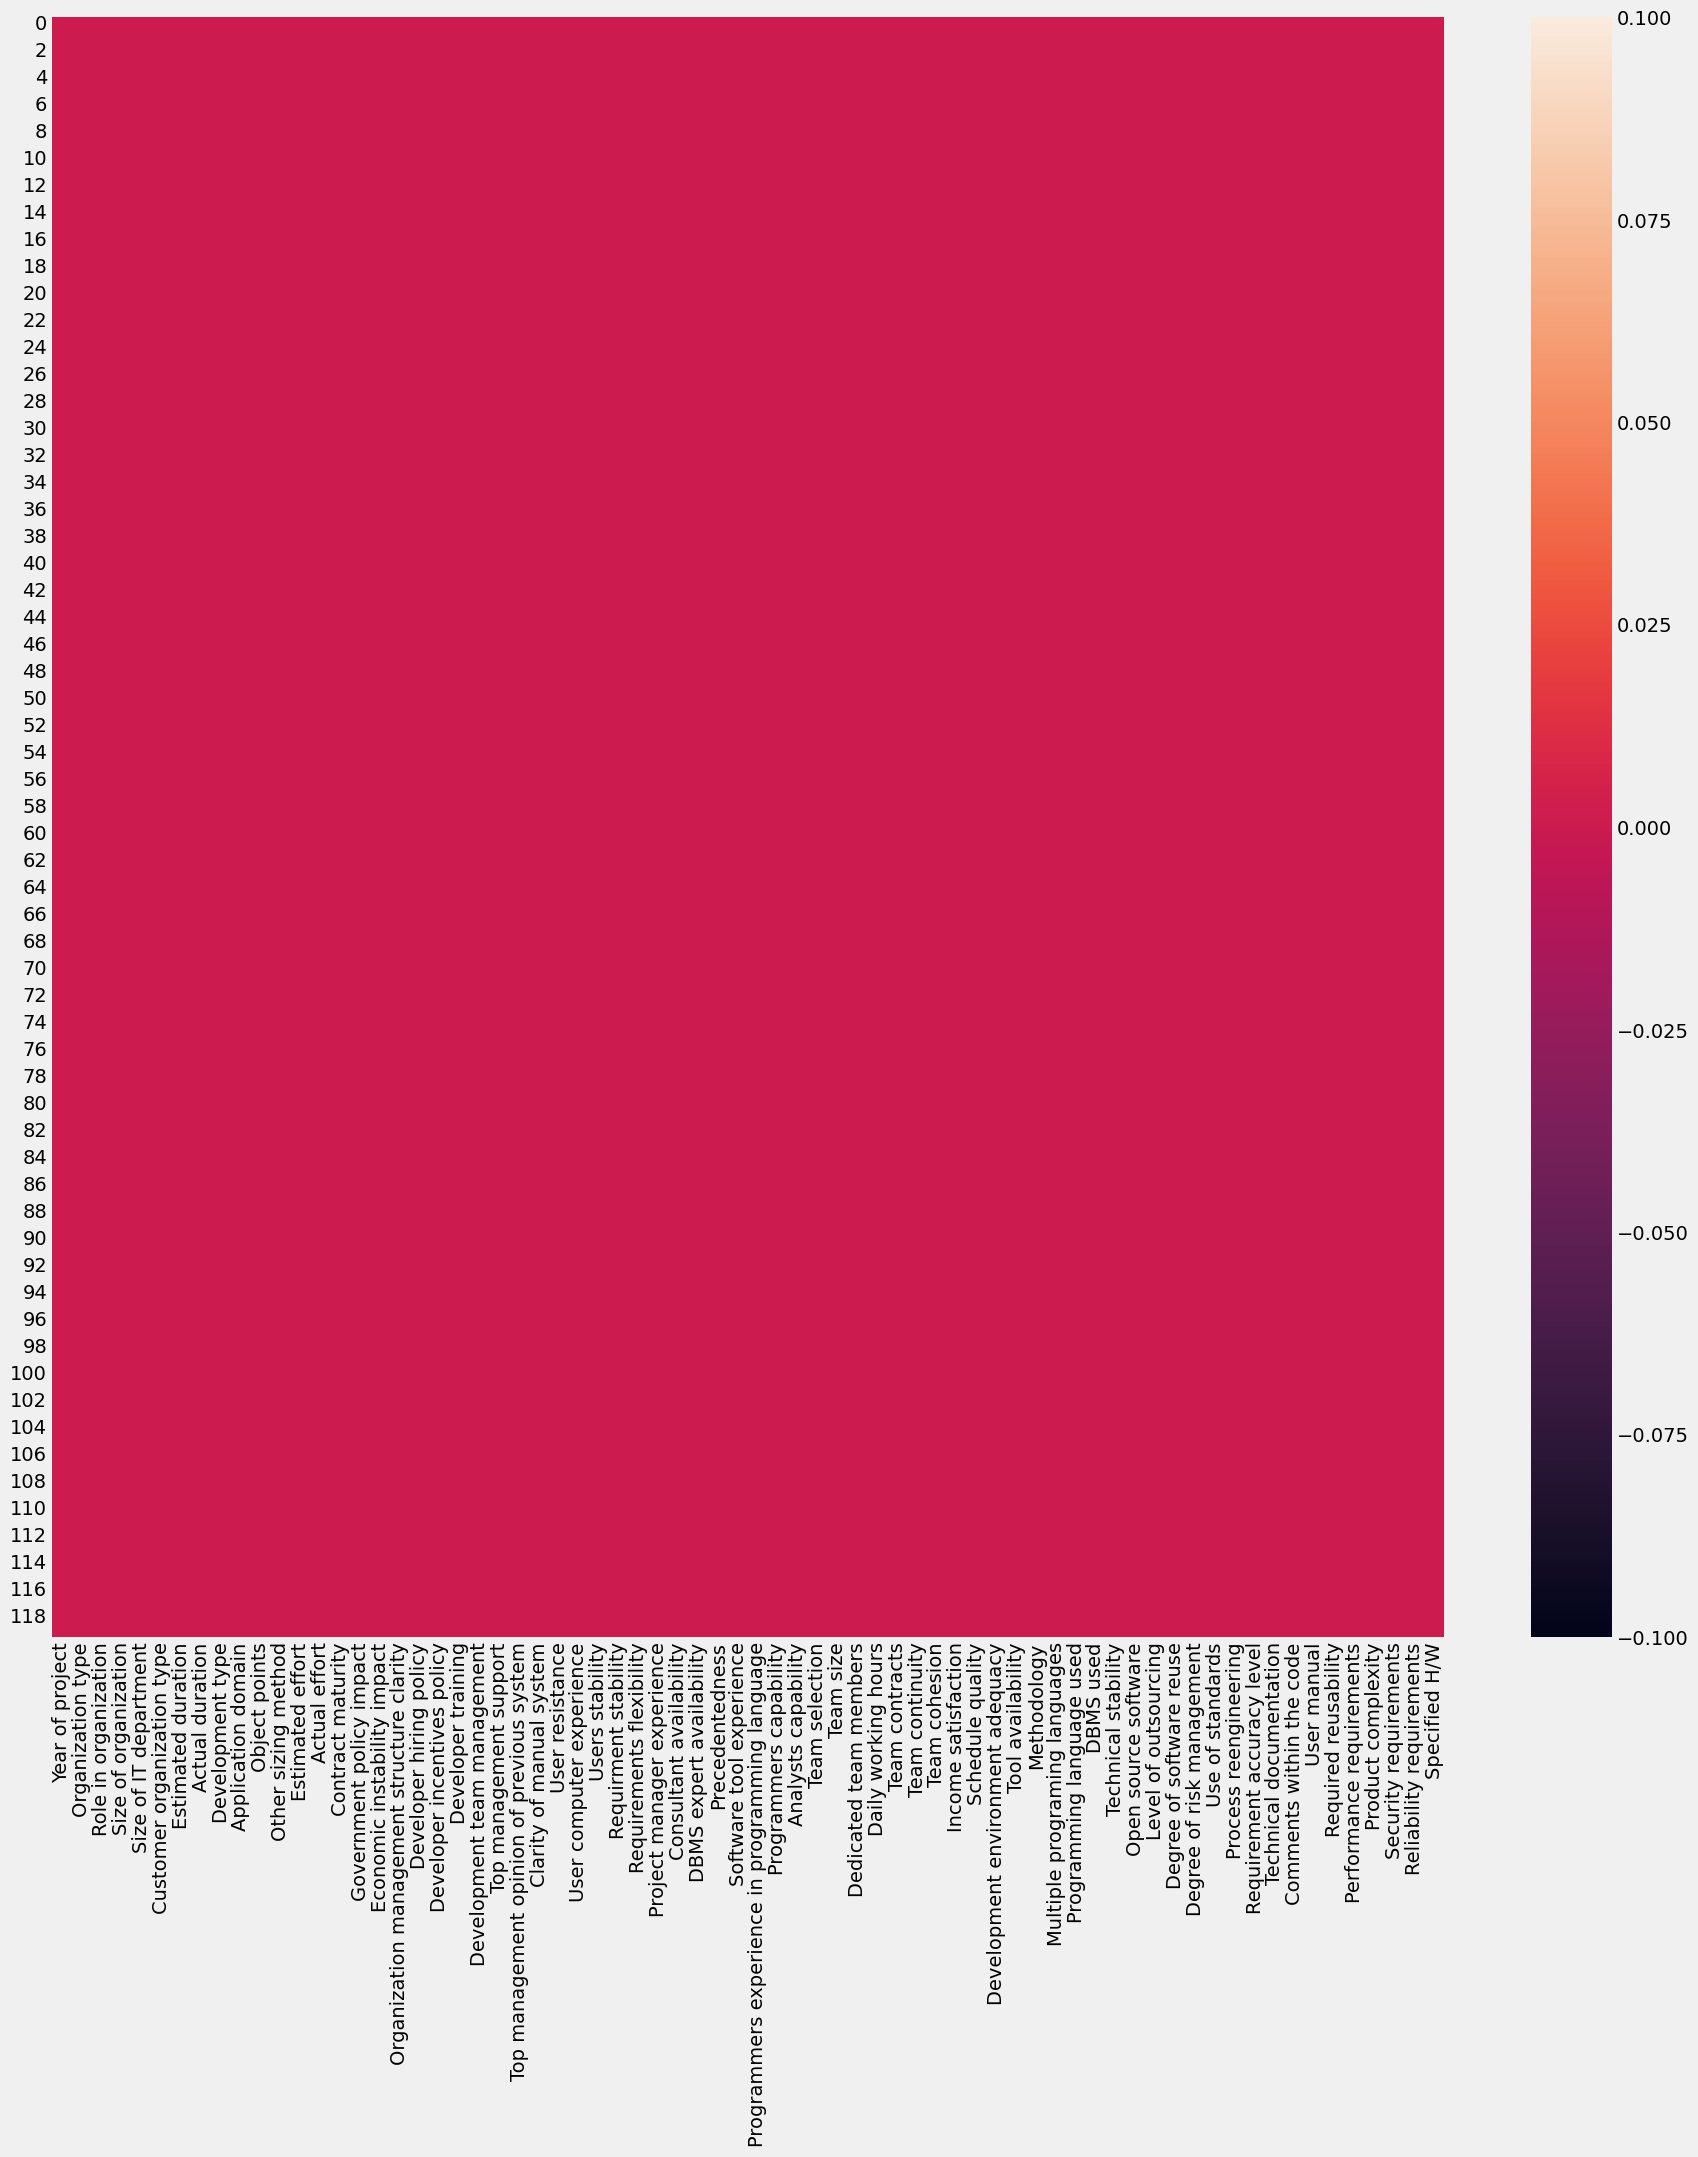

In [ ]:
dv.missing_values_map(df_sierra)

In [ ]:
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import StandardScaler

# # Assuming df_sierra is your DataFrame
# # Replace null values with the mean of each column
# imputer = SimpleImputer(strategy='mean')
# df_sierra_imputed = pd.DataFrame(imputer.fit_transform(df_sierra), columns=df_sierra.columns)

# # Standardize the data (normalize)
# scaler = StandardScaler()
# df_sierra = pd.DataFrame(scaler.fit_transform(df_sierra_imputed), columns=df_sierra.columns)

# # Display the first few rows of the normalized DataFrame
# df_sierra.head()

In [ ]:
df_sierra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 70 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Year of project                                 120 non-null    int64  
 1   Organization type                               120 non-null    int64  
 2   Role in organization                            120 non-null    int64  
 3   Size of organization                            120 non-null    int64  
 4   Size of IT department                           120 non-null    int64  
 5   Customer organization type                      120 non-null    int64  
 6   Estimated duration                              120 non-null    float64
 7   Actual duration                                 120 non-null    float64
 8   Development type                                120 non-null    int64  
 9   Application domain                         

Ambil hanya kolom numerical

In [ ]:
# # import datadictionary as dd
# import visualization as dv
# # numerical_columns = list(set(df_sierra.columns) - set(dd.categorical_cols_names()))
# arrHeading.sort()
# len(arrHeading)

# dv.corr_matrix(df_sierra[arrHeading])
# import data_manipulation as dm
# import data_visualization as dv
import data_dictionary as dd
# import data_preprocessing as dp
numerical_columns = list(set(df_sierra.columns) - set(dd.categorical_cols_names()))
# numerical_columns.sort()
print("Numerical Column : ", len(numerical_columns))

Numerical Column :  35


In [ ]:
df_sierra[numerical_columns].describe()

,Team continuity,Year of project,User resistance,Multiple programing languages,Security requirements,Precedentedness,Development team management,Team contracts,Developer incentives policy,Daily working hours,Technical stability,Users stability,Degree of risk management,Object points,Estimated effort,Other sizing method,Contract maturity,Dedicated team members,Clarity of manual system,Tool availability,Requirment stability,Requirements flexibility,Team cohesion,Actual effort,User computer experience,Economic instability impact,Performance requirements,Analysts capability,Process reengineering,Programmers capability,Estimated duration,Actual duration,Top management support,Development environment adequacy,Team size
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000
mean,11.449074,2011.958333,2.612500,1.191667,2.521008,2.630252,4.109244,1.669725,5.655462,8.258333,1.226891,3.137037,2.436975,203.474576,5225.183333,2.241667,4.341667,4.266667,4.277311,6.789916,2.653439,2.548148,2.890756,9060.929167,1.575000,1.958333,1.638655,1.731092,2.101614,1.781513,5.670833,10.375000,3.675000,1.226891,5.741667
std,20.047909,6.267692,0.777743,0.472715,1.051999,1.060090,2.081491,1.021245,1.611080,1.600923,0.614078,1.354082,0.826440,248.694768,6881.106926,0.819877,1.621784,6.446592,1.389785,1.613358,1.102471,1.367120,1.442395,12598.482007,0.617157,1.252868,0.923376,0.941101,1.173202,0.954068,3.685793,8.903604,1.131389,0.571552,6.343787
min,0.000000,1993.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,4.000000,1.000000,1.888889,1.000000,7.000000,176.000000,1.000000,1.000000,0.000000,2.000000,2.000000,1.000000,1.000000,1.000000,396.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.250000,0.500000,1.000000,1.000000,1.000000
25%,0.000000,2008.750000,2.000000,1.000000,2.000000,2.000000,2.750000,1.000000,4.000000,8.000000,1.000000,1.888889,2.000000,37.000000,1278.750000,2.000000,3.000000,1.000000,3.000000,5.000000,1.634921,1.444444,2.000000,2112.000000,1.000000,1.000000,1.000000,1.000000,1.444444,1.000000,3.000000,5.000000,4.000000,1.000000,3.000000
50%,0.000000,2014.000000,2.500000,1.000000,2.000000,3.000000,3.500000,1.000000,6.000000,8.000000,1.000000,1.888889,3.000000,96.500000,2860.000000,2.000000,4.000000,3.000000,4.000000,8.000000,2.746032,1.888889,3.000000,4576.000000,2.000000,1.000000,1.000000,1.000000,1.444444,2.000000,5.000000,8.000000,4.000000,1.000000,5.000000
75%,20.000000,2017.000000,3.000000,1.000000,3.000000,3.250000,5.000000,2.000000,7.000000,8.000000,1.000000,4.555556,3.000000,333.500000,6336.000000,2.000000,5.000000,5.000000,6.000000,8.000000,3.539683,4.111111,3.000000,10032.000000,2.000000,3.000000,2.000000,2.000000,2.333333,2.000000,7.000000,12.000000,4.000000,1.000000,6.000000
max,100.000000,2019.000000,4.750000,3.000000,5.000000,4.000000,11.000000,5.000000,8.000000,14.000000,4.000000,5.000000,3.000000,1700.000000,50688.000000,5.000000,8.000000,48.000000,8.000000,8.000000,4.809524,5.000000,8.000000,79200.000000,3.000000,7.000000,4.000000,4.000000,5.000000,4.000000,20.000000,48.000000,5.000000,4.000000,48.000000


In [ ]:
df_numeric = df_sierra[numerical_columns]
df_numeric.corr()

,Team continuity,Year of project,User resistance,Multiple programing languages,Security requirements,Precedentedness,Development team management,Team contracts,Developer incentives policy,Daily working hours,Technical stability,Users stability,Degree of risk management,Object points,Estimated effort,Other sizing method,Contract maturity,Dedicated team members,Clarity of manual system,Tool availability,Requirment stability,Requirements flexibility,Team cohesion,Actual effort,User computer experience,Economic instability impact,Performance requirements,Analysts capability,Process reengineering,Programmers capability,Estimated duration,Actual duration,Top management support,Development environment adequacy,Team size
Team continuity,1.000000,0.099331,0.054853,0.112059,-0.058133,0.103290,-0.027584,0.026227,0.031565,-0.058454,-0.100274,0.226713,0.016943,-0.003102,0.052951,0.015125,-0.101440,0.061883,0.107838,0.007057,-0.049424,-0.012199,0.192356,0.118744,0.019720,0.314511,0.076254,0.125384,-0.050868,0.087641,-0.103948,0.000707,0.244619,0.226359,0.074204
Year of project,0.099331,1.000000,0.123797,0.238128,0.198475,0.022680,-0.094053,-0.152628,-0.095787,-0.307949,-0.136468,-0.052350,-0.149566,-0.142600,-0.043742,0.170412,0.160140,0.079517,0.149741,-0.310231,-0.075075,0.130506,-0.048523,-0.029792,-0.037203,0.022250,0.254137,0.118306,-0.316404,0.121693,-0.169019,-0.175449,0.084582,0.050425,0.058482
User resistance,0.054853,0.123797,1.000000,0.066571,-0.116905,0.056358,0.233558,-0.119389,0.219386,-0.123087,0.254612,0.293776,0.129393,0.235644,0.154825,0.108558,-0.009077,0.112966,0.308217,-0.061456,0.279432,0.223840,0.242242,0.228137,0.144217,0.201048,-0.085696,0.115317,0.155165,0.186029,0.247178,0.346994,0.273489,0.278283,0.126442
Multiple programing languages,0.112059,0.238128,0.066571,1.000000,0.186873,0.130208,-0.140092,-0.215751,-0.148079,0.089481,0.006811,-0.090974,-0.261917,0.062405,0.171603,0.204717,-0.140944,0.162328,0.046327,-0.226852,0.012584,-0.162491,0.040598,0.164129,0.079932,0.084542,0.126836,0.125559,-0.141480,0.048226,0.072688,0.002745,-0.039674,-0.023784,0.103519
Security requirements,-0.058133,0.198475,-0.116905,0.186873,1.000000,-0.000570,-0.239280,-0.267236,-0.423512,0.263695,-0.117947,0.043051,-0.174873,-0.096518,-0.132668,0.125594,-0.206289,0.045555,-0.058017,-0.366261,-0.259436,-0.056454,-0.161859,-0.113958,-0.005547,-0.117282,0.297619,-0.011270,-0.293431,-0.087525,-0.299443,-0.198858,-0.403567,-0.126723,-0.038347
Precedentedness,0.103290,0.022680,0.056358,0.130208,-0.000570,1.000000,0.015227,-0.206943,-0.075465,-0.067033,0.270868,0.222732,-0.064966,0.040779,0.151695,0.277707,-0.041403,0.162241,0.001208,-0.069985,0.165609,-0.057171,0.067011,0.182734,-0.075232,0.159135,0.103884,0.279379,-0.137497,0.294015,0.174654,0.211417,0.071536,0.082983,0.132938
Development team management,-0.027584,-0.094053,0.233558,-0.140092,-0.239280,0.015227,1.000000,0.205312,0.399636,-0.127064,-0.007898,0.056913,0.351448,0.031062,-0.068406,-0.054993,0.050268,-0.111088,0.232792,0.265159,0.065150,0.127299,0.201769,-0.009972,0.121487,0.228381,-0.253158,0.068223,0.220716,0.101907,0.015800,0.181552,-0.009775,0.113910,-0.066934
Team contracts,0.026227,-0.152628,-0.119389,-0.215751,-0.267236,-0.206943,0.205312,1.000000,0.048170,-0.113407,-0.070142,-0.126864,0.075278,0.034068,-0.003866,-0.134708,-0.042871,-0.141799,-0.012675,0.165798,0.016923,-0.000515,-0.069715,-0.081090,-0.126969,-0.124727,-0.100692,-0.006447,0.111937,-0.116081,0.070498,-0.098078,0.003136,0.016040,-0.032773
Developer incentives policy,0.031565,-0.095787,0.219386,-0.148079,-0.423512,-0.075465,0.399636,0.048170,1.000000,-0.349658,-0.137310,-0.092967,0.508672,-0.046950,-0.258934,-0.197272,0.380025,-0.348983,0.187855,0.484607,0.135180,0.081308,0.168306,-0.249620,0.020525,0.130075,-0.297480,-0.027713,0.374704,0.008363,0.080729,0.077253,0.200836,-0.010943,-0.324825
Daily working hours,-0.058454,-0.307949,-0.123087,0.089481,0.263695,-0.067033,-0.127064,-0.113407,-0.349658,1.000000,0.076

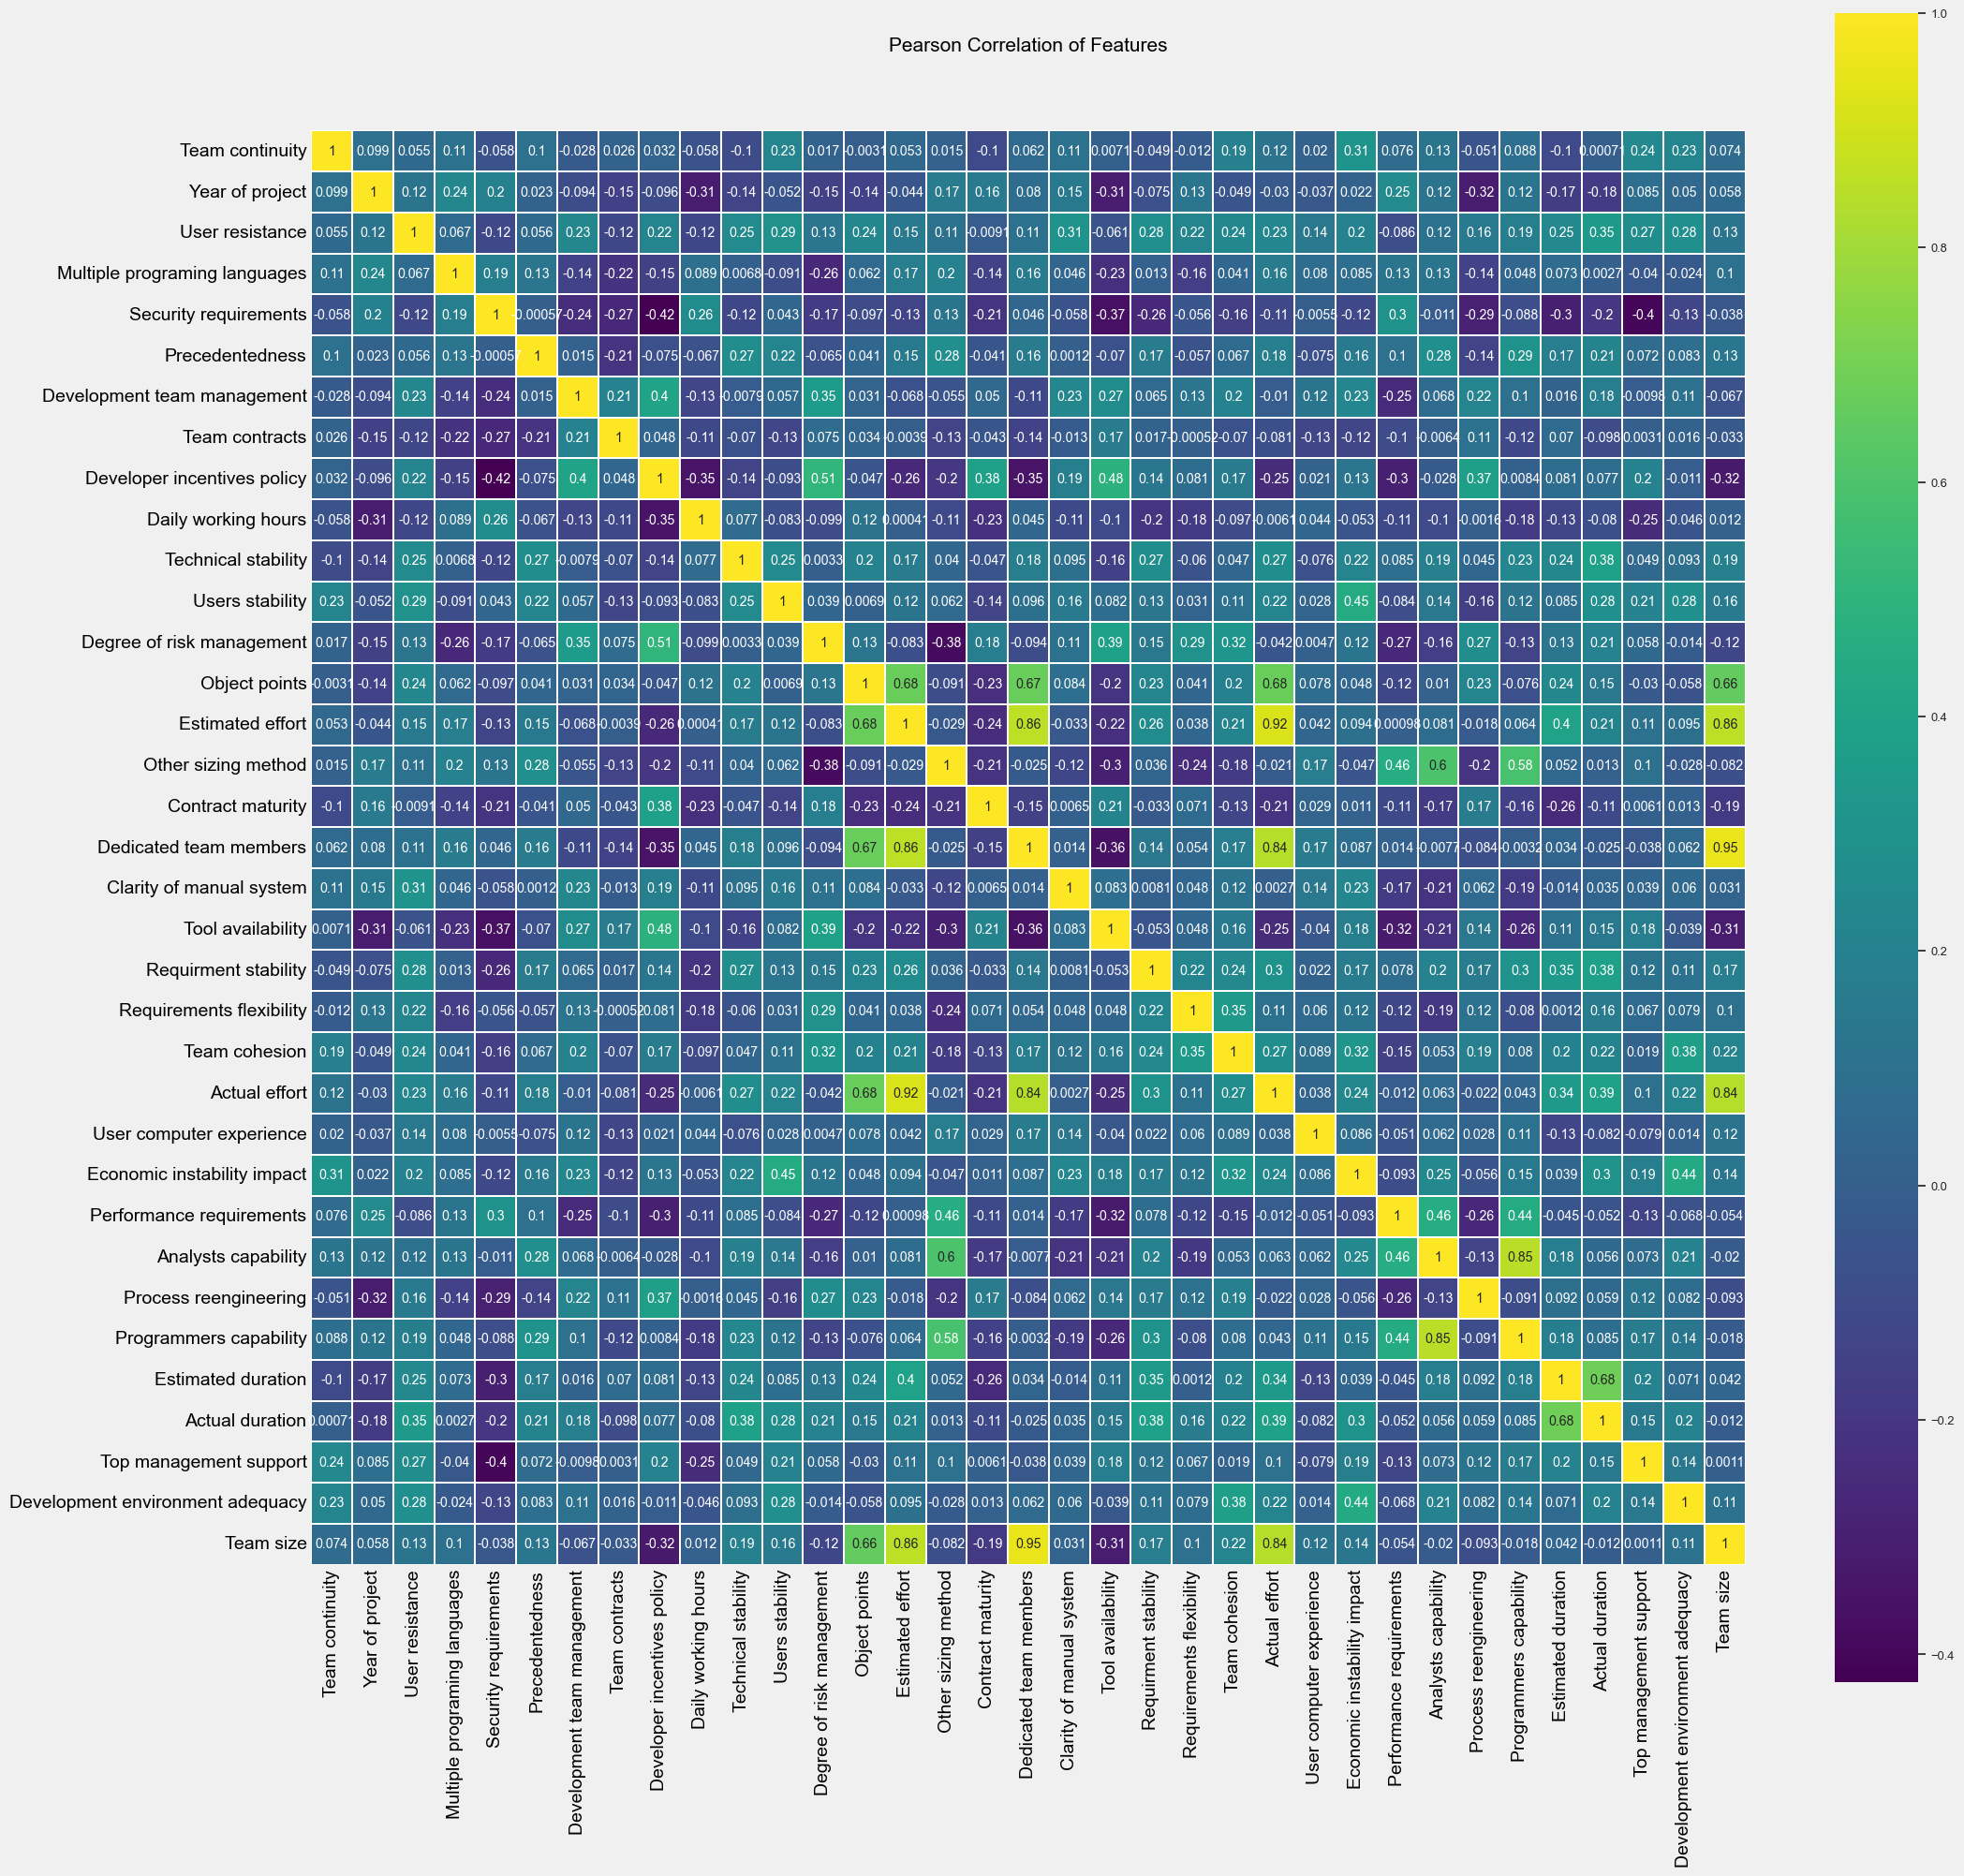

In [ ]:
colormap = plt.cm.viridis
plt.figure(figsize=(22,22))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.set(font_scale=0.85)

# Atur warna latar belakang menjadi putih
ax = plt.gca()
ax.set_facecolor("white")

sns.heatmap(df_numeric.corr(), linewidths=0.1, vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)
plt.show()


Fitur dengan Korelasi Tinggi terhadap Actual Effort:
                  Feature  Correlation Score
4           Actual effort           1.000000
1        Estimated effort           0.918825
7               Team size           0.841997
2  Dedicated team members           0.838947
0           Object points           0.676340
6         Actual duration           0.393358
5      Estimated duration           0.341756
3    Requirment stability           0.302480
['Object points', 'Estimated effort', 'Dedicated team members', 'Requirment stability', 'Actual effort', 'Estimated duration', 'Actual duration', 'Team size']


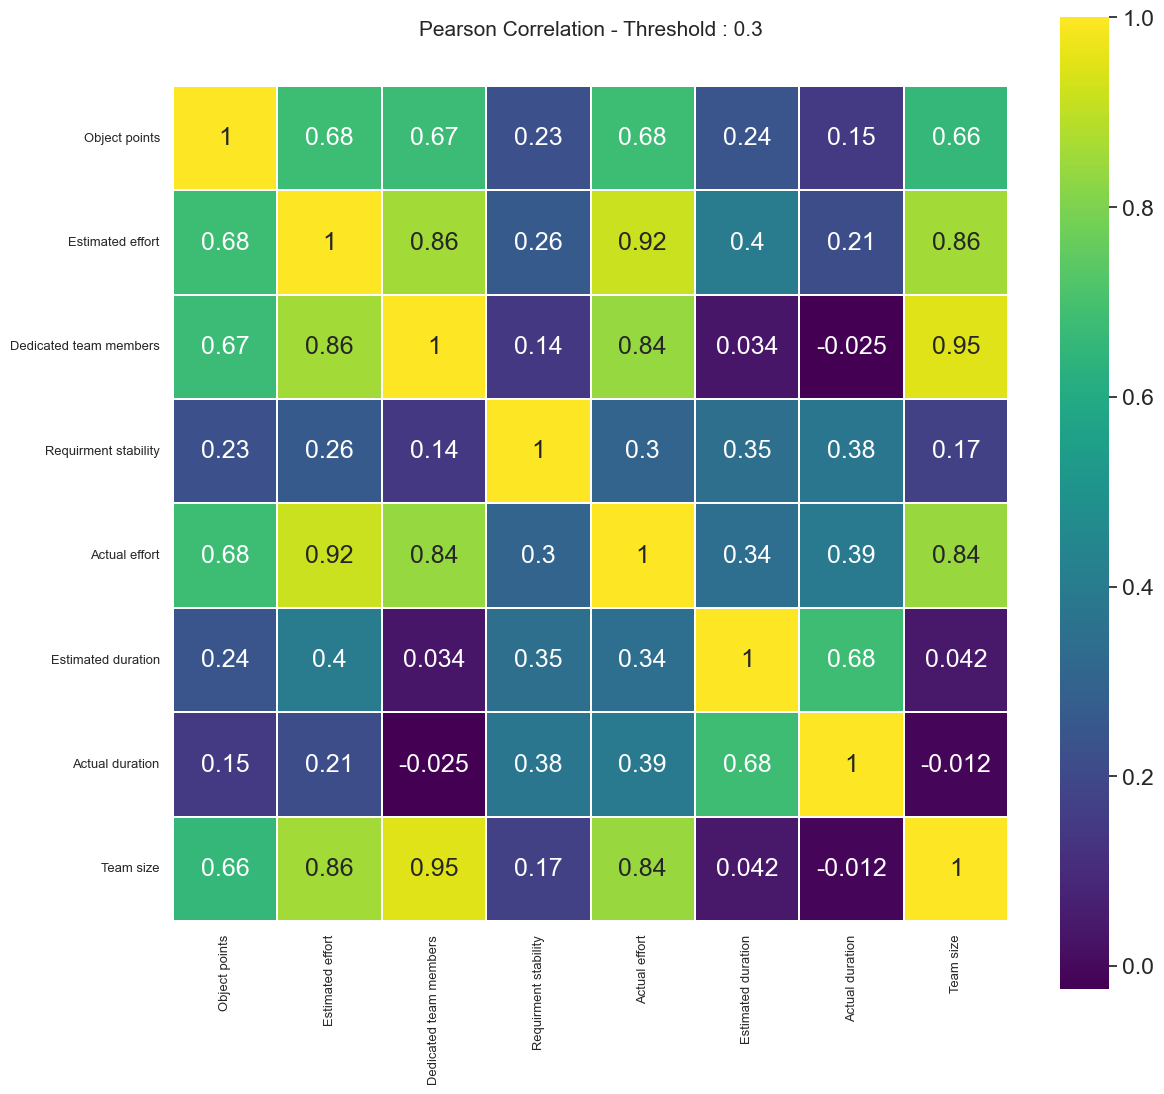

In [ ]:
def highCorr(dataframe, target_column, threshold):
    corr_matrix = dataframe.corr()
    koloms = corr_matrix[abs(corr_matrix[target_column]) > threshold][target_column].index
    return dataframe[koloms]

threshold = 0.3
HCFeature = highCorr(df_numeric, 'Actual effort',threshold)
# Membuat DataFrame untuk menampung fitur dan skor korelasi
corr_data = {'Feature': [], 'Correlation Score': []}

# Mengisi DataFrame
for feature in HCFeature.columns:
    correlation_score = df_numeric[feature].corr(df_numeric['Actual effort'])
    corr_data['Feature'].append(feature)
    corr_data['Correlation Score'].append(correlation_score)

# Mencetak tabel
corr_table = pd.DataFrame(corr_data).sort_values(by='Correlation Score', ascending=False)

print("Fitur dengan Korelasi Tinggi terhadap Actual Effort:")
print(corr_table)
arrHCF = HCFeature.columns.tolist()
print(arrHCF)
colormap = plt.cm.viridis
plt.figure(figsize=(12, 12))
plt.title(f'Pearson Correlation - Threshold : {threshold}', y=1.05, size=15)
sns.set(font_scale=1.5)
sns.heatmap(HCFeature.astype(float).corr(), linewidths=0.1, vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)
plt.show()

### High correlations ###
<!-- 1.  Actual duration: Estimated duration (0.68)
2.  Actual effort: Estimated effort (0.92), Dedicated team members (0.84), Object points (0.69), Team size (0.84)
3.  Analysts capability: Programmers capability (0.85)
4.  Dedicated team member: Team size (0.95), Estimated effort (0.86)
5.  Estimated effort: Object points (0.68), Team size (0.86) -->

Dedicated team members
Object points
Actual effort
Estimated effort
Team size

In [ ]:
features = arrHeading
print(features)
# features
# max_corr_features = ['Actual duration',  'Analysts capability','Dedicated team members','Estimated effort']
max_corr_features = ['Estimated effort','Team size','Dedicated team members', 'Object points', 'Actual duration', 'Estimated duration','Requirment stability']
# max_corr_features = ['Object points', 'Estimated duration', 'Team size','Development environment adequacy','Developer incentives policy','Requirement accuracy level','Degree of risk management','Estimated effort']
# max_corr_features = ['Actual duration', 'Analysts capability', 'Application domain','Developer incentives policy','Programming language used','Size of organization','Degree of risk management','Estimated effort']
# max_corr_features = ['Actual duration', 'Analysts capability', 'Application domain','Developer incentives policy','Programming language used']
# 'Object points': Metrik yang mengukur ukuran dan kompleksitas perangkat lunak.
# 'Estimated duration': Durasi perkiraan proyek.
# df_sierra = df_sierra.dropna(axis=0)

X = df_sierra[max_corr_features]
# X = df_sierra[features]
# y = df_sierra['Estimated effort']
y = df_sierra['Actual effort']

# X.describe()
X.isnull().sum().sum()

['Actual duration', 'Actual effort', 'Analysts capability', 'Application domain', 'Clarity of manual system', 'Comments within the code', 'Consultant availability', 'Contract maturity', 'Customer organization type', 'DBMS expert availability', 'DBMS used', 'Daily working hours', 'Dedicated team members', 'Degree of risk management', 'Degree of software reuse', 'Developer hiring policy', 'Developer incentives policy', 'Developer training', 'Development environment adequacy', 'Development team management', 'Development type', 'Economic instability impact', 'Estimated duration', 'Estimated effort', 'Government policy impact', 'Income satisfaction', 'Level of outsourcing', 'Methodology', 'Multiple programing languages', 'Object points', 'Open source software', 'Organization management structure clarity', 'Organization type', 'Other sizing method', 'Performance requirements', 'Precedentedness', 'Process reengineering', 'Product complexity', 'Programmers capability', 'Programmers experience 

0

KNN

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=22)

neigh = KNeighborsRegressor(n_neighbors=3, weights='uniform')
neigh.fit(X_train, y_train)
# Akurasi
print(neigh.score(X_test, y_test))
# Menghitung prediksi
predict = neigh.predict(X_test)
# Menghitung R-squared (Coefficient of Determination)
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
r_square_knn = r2_score(y_test, predict)
# Menghitung Mean Square Error (MSE)
mse_knn = mean_squared_error(y_test, predict)*0.000001
# Menghitung Mean Absolute Error (MAE)
mae_knn = mean_absolute_error(y_test, predict)*0.001
# Menghitung Mean Magnitude of Relative Error (MMRE)
mmre_knn = np.mean((predict - y_test) / y_test)
# Menghitung Median Magnitude of Relative Error (MdMRE)
mdmre_knn = np.median((predict - y_test) / y_test)
# Menghitung Mean Magnitude of Error Relative (MMER)
mmer_knn = (abs(predict - y_test)).mean()*0.001
# Menghitung Prediction Accuracy 25%
acc_25_knn = sum(abs((predict - y_test) / y_test) <= 0.25) / len(y_test) * 100
# Menghitung Prediction Accuracy 50%
acc_50_knn = sum(abs((predict - y_test) / y_test) <= 0.50) / len(y_test) * 100
#RMSE
rmse_knn = np.sqrt(mse_knn)
# Menampilkan hasil dalam bentuk persentase
print("Prediction Accuracy 25%: {:.2f}%".format(acc_25_knn))
print("Prediction Accuracy 50%: {:.2f}%".format(acc_50_knn))
print("Root Mean Square (RMSE):",rmse_knn)
print("R-squared (R2):", r_square_knn)
print("Mean Absolute Error (MAE):", mae_knn)
print("Mean Magnitude of Relative Error (MMRE):", mmre_knn)
print("Median Magnitude of Relative Error (MdMRE):", mdmre_knn)
print("Mean Magnitude of Error Relative (MMER):", mmer_knn )
print("Mean Square Error: ",mse_knn)

CV_KNN = np.mean(cross_val_score(neigh, X, y, cv=10, scoring='neg_mean_squared_error'))

# Tampilkan mean score
print("Mean Score (Neg MSE) from 10-fold Cross Validation: {:.2f}".format(CV_KNN))

0.5513293685265304
Prediction Accuracy 25%: 25.00%
Prediction Accuracy 50%: 65.00%
Root Mean Square (RMSE): 12.222933678841633
R-squared (R2): 0.5513293685265304
Mean Absolute Error (MAE): 6.159495833333333
Mean Magnitude of Relative Error (MMRE): 0.32053572405276176
Median Magnitude of Relative Error (MdMRE): -0.22881593714927045
Mean Magnitude of Error Relative (MMER): 6.159495833333333
Mean Square Error:  149.40010771736107
Mean Score (Neg MSE) from 10-fold Cross Validation: -47405824.93


Linear Regression

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=22)

model = LinearRegression()
model.fit(X_train, y_train)
print(model.score(X_test, y_test))
predict = model.predict(X_test)
rmse_linear = np.sqrt(mean_squared_error(y_test, predict))*0.001
mae_linear = mean_absolute_error(y_test, predict)*0.001
print("Root mean square: ", rmse_linear)
print("Mean Absolute Error: ", mae_linear)

# 7 Jenis Error Tambahan
# Prediction Accuracy 25%
acc_25_linear = sum(abs((predict - y_test) / y_test) <= 0.25) / len(y_test) * 100

# Prediction Accuracy 50%
acc_50_linear = sum(abs((predict - y_test) / y_test) <= 0.50) / len(y_test) * 100

# R Square
r_square_linear = model.score(X_test, y_test)

# Mean Magnitude of Relative Error
mmre_linear = (abs((predict - y_test) / y_test)).mean()

# Median Magnitude of Relative Error
mdmre_linear = np.median(abs((predict - y_test) / y_test))

# Mean Magnitude of Error Relative
mmer_linear = (abs(predict - y_test)).mean()*0.001

# Mean Square Error
mse_linear = mean_squared_error(y_test, predict)*0.000001

# Menampilkan hasil
print("Prediction Accuracy 25%: {:.2f}%".format(acc_25_linear))
print("Prediction Accuracy 50%: {:.2f}%".format(acc_50_linear))
print("R Square: {:.2f}".format(r_square_linear))
print("Mean Magnitude of Relative Error: {:.2f}".format(mmre_linear))
print("Median Magnitude of Relative Error: {:.2f}".format(mdmre_linear))
print("Mean Magnitude of Error Relative: {:.2f}".format(mmer_linear))
print("Mean Square Error: {:.2f}".format(mse_linear))

CV_linear = np.mean(cross_val_score(model, X, y, cv=10, scoring='neg_mean_squared_error'))

# Tampilkan mean score
print("Mean Score (Neg MSE) from 10-fold Cross Validation: {:.2f}".format(CV_linear))


0.9096886215730654
Root mean square:  5.483815936366301
Mean Absolute Error:  2.872839193438385
Prediction Accuracy 25%: 62.50%
Prediction Accuracy 50%: 75.00%
R Square: 0.91
Mean Magnitude of Relative Error: 0.37
Median Magnitude of Relative Error: 0.19
Mean Magnitude of Error Relative: 2.87
Mean Square Error: 30.07
Mean Score (Neg MSE) from 10-fold Cross Validation: -19518957.21


SVM

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=22)


# 7 Jenis Error TambaX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=22)

parameters = {'kernel':('linear', 'rbf'), 'C':[1,2,3,4,5,6,7,8,9,10], 'gamma':('auto', 'scale')}

svr = SVR()
LinearSVC = GridSearchCV(svr, parameters, cv=3)
LinearSVC.fit(X_train, y_train)
print("Best params hash: {}".format(LinearSVC.best_params_))
print(LinearSVC.score(X_test, y_test))
predict = LinearSVC.predict(X_test)
rmse_svm =np.sqrt(mean_squared_error(y_test, predict))*0.001
mae_svm = mean_absolute_error(y_test, predict)*0.001
print("Root mean square: ", rmse_svm )
print("Mean Absolute Error: ", mae_svm)

# 7 Jenis Error Tambahan
# Prediction Accuracy 25%
acc_25_svm = sum(abs((predict - y_test) / y_test) <= 0.25) / len(y_test) * 100

# Prediction Accuracy 50%
acc_50_svm = sum(abs((predict - y_test) / y_test) <= 0.50) / len(y_test) * 100

# R Square
r_square_svm = r2_score(y_test, predict)

# Mean Magnitude of Relative Error
mmre_svm = (abs((predict - y_test) / y_test)).mean()

# Median Magnitude of Relative Error
mdmre_svm = np.median(abs((predict - y_test) / y_test))

# Mean Magnitude of Error Relative
mmer_svm = (abs(predict - y_test)).mean()*0.001

# Mean Square Error
mse_svm = mean_squared_error(y_test, predict)*0.000001

# Menampilkan hasil
print("Prediction Accuracy 25%: {:.2f}%".format(acc_25_svm))
print("Prediction Accuracy 50%: {:.2f}%".format(acc_50_svm))
print("R Square: {:.2f}".format(r_square_svm))
print("Mean Magnitude of Relative Error: {:.2f}".format(mmre_svm))
print("Median Magnitude of Relative Error: {:.2f}".format(mdmre_svm))
print("Mean Magnitude of Error Relative: {:.2f}".format(mmer_svm))
print("Mean Square Error: {:.2f}".format(mse_svm))
# # Lakukan K-Fold Cross Validation dan hitung mean score
# CV_SVM = np.mean(cross_val_score(LinearSVC, X, y, cv=10, scoring='neg_mean_squared_error'))
# print("Mean Score (Neg MSE) from 10-fold Cross Validation: {:.2f}".format(CV_SVM))

Best params hash: {'C': 10, 'gamma': 'auto', 'kernel': 'linear'}
0.9103143424486593
Root mean square:  5.464785652803812
Mean Absolute Error:  2.3481309237599186
Prediction Accuracy 25%: 65.00%
Prediction Accuracy 50%: 85.00%
R Square: 0.91
Mean Magnitude of Relative Error: 0.29
Median Magnitude of Relative Error: 0.11
Mean Magnitude of Error Relative: 2.35
Mean Square Error: 29.86


In [ ]:
best_svm_model = SVR(kernel=LinearSVC.best_params_['kernel'], C=LinearSVC.best_params_['C'], gamma=LinearSVC.best_params_['gamma'])
kf = KFold(n_splits=10, shuffle=True, random_state=42)
cv_scores = cross_val_score(best_svm_model, X_train, y_train, cv=kf)
print("Cross-Validation Scores:")
print(cv_scores)
# Print the mean and standard deviation of the cross-validation scores
print("Mean Cross-Validation Score: {:.2f}".format(cv_scores.mean()))
print("Standard Deviation of Cross-Validation Scores: {:.2f}".format(cv_scores.std()))


Cross-Validation Scores:
[0.81257343 0.98974188 0.60577202 0.93115273 0.95158529 0.89361866
 0.94438681 0.95655111 0.7945541  0.91754959]
Mean Cross-Validation Score: 0.88
Standard Deviation of Cross-Validation Scores: 0.11


Bayesian Regression

In [ ]:
# Bayesian Regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=22)
bayesian_model = BayesianRidge()
bayesian_model.fit(X_train, y_train)
y_pred_bayesian = bayesian_model.predict(X_test)
rmse_bayesian = np.sqrt(mean_squared_error(y_test, y_pred_bayesian))*0.001
mae_bayesian = mean_absolute_error(y_test, y_pred_bayesian)*0.001
print("Bayesian Regression RMSE:", rmse_bayesian)
print("Bayesian Regression MAE:", mae_bayesian)

# 7 Jenis Error Tambahan
# Prediction Accuracy 25%
acc_25_bayesian = sum(abs((y_pred_bayesian - y_test) / y_test) <= 0.25) / len(y_test) * 100

# Prediction Accuracy 50%
acc_50_bayesian = sum(abs((y_pred_bayesian - y_test) / y_test) <= 0.50) / len(y_test) * 100

# R Square
r_square_bayesian = r2_score(y_test, y_pred_bayesian)

# Mean Magnitude of Relative Error
mmre_bayesian = (abs((y_pred_bayesian - y_test) / y_test)).mean()

# Median Magnitude of Relative Error
mdmre_bayesian = np.median(abs((y_pred_bayesian - y_test) / y_test))

# Mean Magnitude of Error Relative
mmer_bayesian = (abs(y_pred_bayesian - y_test)).mean()*0.001

# Mean Square Error
mse_bayesian = mean_squared_error(y_test, y_pred_bayesian)*0.000001

# Menampilkan hasil
print("Prediction Accuracy 25%: {:.2f}%".format(acc_25_bayesian))
print("Prediction Accuracy 50%: {:.2f}%".format(acc_50_bayesian))
print("R Square: {:.2f}".format(r_square_bayesian))
print("Mean Magnitude of Relative Error: {:.2f}".format(mmre_bayesian))
print("Median Magnitude of Relative Error: {:.2f}".format(mdmre_bayesian))
print("Mean Magnitude of Error Relative: {:.2f}".format(mmer_bayesian))
print("Mean Square Error: {:.2f}".format(mse_bayesian))


# Menggunakan KFold tanpa stratifikasi
kf = KFold(n_splits=10, shuffle=True, random_state=22)
cv_results = cross_val_score(bayesian_model, X, y, cv=kf, scoring='neg_mean_squared_error')
print("Mean Score (Neg MSE) from 5-fold Cross Validation: {:.2f}".format(np.mean(cv_results)))

# Lakukan K-Fold Cross Validation dan hitung mean score
CV_bayesian = np.mean(cross_val_score(bayesian_model, X, y, cv=10, scoring='neg_mean_squared_error'))

# Tampilkan mean score
print("Mean Score (Neg MSE) from 10-fold Cross Validation: {:.2f}".format(CV_bayesian))

Bayesian Regression RMSE: 6.74827851701699
Bayesian Regression MAE: 3.6710364723970077
Prediction Accuracy 25%: 45.00%
Prediction Accuracy 50%: 67.50%
R Square: 0.86
Mean Magnitude of Relative Error: 0.41
Median Magnitude of Relative Error: 0.31
Mean Magnitude of Error Relative: 3.67
Mean Square Error: 45.54
Mean Score (Neg MSE) from 5-fold Cross Validation: -30049971.54
Mean Score (Neg MSE) from 10-fold Cross Validation: -30136561.25


Logistic Regression

In [ ]:
# Import pustaka yang diperlukan
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np


scaler = StandardScaler()
# Melakukan penskalaan pada data latih dan uji
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=22)

# Membuat dan melatih model Regresi Logistik dengan data yang telah discaling
logistic_model = LogisticRegression(max_iter=9000)
logistic_model.fit(X_train_scaled, y_train)

# Melakukan prediksi pada data uji yang telah discaling
y_pred_logistic = logistic_model.predict(X_test_scaled)

# Menghitung berbagai metrik kesalahan (error metrics)
rmse_logistic = np.sqrt(mean_squared_error(y_test, y_pred_logistic))*0.001
mae_logistic = mean_absolute_error(y_test, y_pred_logistic)*0.001

# Menghitung akurasi prediksi untuk threshold 25% dan 50%
acc_25_logistic = sum(abs((y_pred_logistic - y_test) / y_test) <= 0.25) / len(y_test) * 100
acc_50_logistic = sum(abs((y_pred_logistic - y_test) / y_test) <= 0.50) / len(y_test) * 100

# Menghitung metrik kesalahan lainnya
r_square_logistic = r2_score(y_test, y_pred_logistic)
mmre_logistic = (abs((y_pred_logistic - y_test) / y_test)).mean()
mdmre_logistic = np.median(abs((y_pred_logistic - y_test) / y_test))
mmer_logistic = (abs(y_pred_logistic - y_test)).mean()*0.001
mse_logistic = mean_squared_error(y_test, y_pred_logistic)*0.000001

# Menampilkan hasil
print("Logistic Regression RMSE:", rmse_logistic)
print("Logistic Regression MAE:", mae_logistic)
print("Prediction Accuracy 25% (Logistic): {:.2f}%".format(acc_25_logistic))
print("Prediction Accuracy 50% (Logistic): {:.2f}%".format(acc_50_logistic))
print("R Square (Logistic): {:.2f}".format(r_square_logistic))
print("Mean Magnitude of Relative Error (Logistic): {:.2f}".format(mmre_logistic))
print("Median Magnitude of Relative Error (Logistic): {:.2f}".format(mdmre_logistic))
print("Mean Magnitude of Error Relative (Logistic): {:.2f}".format(mmer_logistic))
print("Mean Square Error (Logistic): {:.2f}".format(mse_logistic))

Logistic Regression RMSE: 13.528130122313653
Logistic Regression MAE: 5.8972375
Prediction Accuracy 25% (Logistic): 22.50%
Prediction Accuracy 50% (Logistic): 60.00%
R Square (Logistic): 0.45
Mean Magnitude of Relative Error (Logistic): 0.49
Median Magnitude of Relative Error (Logistic): 0.40
Mean Magnitude of Error Relative (Logistic): 5.90
Mean Square Error (Logistic): 183.01


In [ ]:
# Import pustaka yang diperlukan
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=22)

# Melakukan penskalaan pada data latih dan uji
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Membuat dan melatih model Regresi Linear dengan data yang telah discaling
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

# Melakukan prediksi pada data uji yang telah discaling
y_pred_linear = linear_model.predict(X_test_scaled)

# Menghitung berbagai metrik kesalahan (error metrics)
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear)) * 0.001
mae_linear = mean_absolute_error(y_test, y_pred_linear) * 0.001

# Menghitung metrik kesalahan lainnya
r_square_linear = r2_score(y_test, y_pred_linear)
mmre_linear = (abs((y_pred_linear - y_test) / y_test)).mean()
mdmre_linear = np.median(abs((y_pred_linear - y_test) / y_test))
mmer_linear = (abs(y_pred_linear - y_test)).mean() * 0.001
mse_linear = mean_squared_error(y_test, y_pred_linear) * 0.000001

# Menampilkan hasil
print("Linear Regression RMSE:", rmse_linear)
print("Linear Regression MAE:", mae_linear)
print("R Square (Linear): {:.2f}".format(r_square_linear))
print("Mean Magnitude of Relative Error (Linear): {:.2f}".format(mmre_linear))
print("Median Magnitude of Relative Error (Linear): {:.2f}".format(mdmre_linear))
print("Mean Magnitude of Error Relative (Linear): {:.2f}".format(mmer_linear))
print("Mean Square Error (Linear): {:.2f}".format(mse_linear))

# Lakukan K-Fold Cross Validation dan hitung mean score
CV_linear = np.mean(cross_val_score(linear_model, X, y, cv=10, scoring='neg_mean_squared_error'))

# Tampilkan mean score
print("Mean Score (Neg MSE) from 10-fold Cross Validation: {:.2f}".format(CV_linear))

Linear Regression RMSE: 5.483815936366071
Linear Regression MAE: 2.8728391934383026
R Square (Linear): 0.91
Mean Magnitude of Relative Error (Linear): 0.37
Median Magnitude of Relative Error (Linear): 0.19
Mean Magnitude of Error Relative (Linear): 2.87
Mean Square Error (Linear): 30.07
Mean Score (Neg MSE) from 10-fold Cross Validation: -19518957.21


Random Forest

In [ ]:
# Random Forest Regression (tanpa PCA) untuk perbandingan
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=22)

# Membuat model Random Forest tanpa PCA
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# Mencetak skor model Random Forest tanpa PCA
print("Random Forest Regression Score (without PCA):", rf_model.score(X_test, y_test))

for i in np.arange(100, 1100, 100):
    regressor = RandomForestRegressor(n_estimators=i, max_features=5)
    regressor.fit(X_train, y_train)
    predict = regressor.predict(X_test)
    rmse_rf = np.sqrt(mean_squared_error(y_test, predict))*0.001
    mae_rf = mean_absolute_error(y_test, predict)*0.001

    # 7 Jenis Error Tambahan
    # Prediction Accuracy 25%
    acc_25_rf = sum(abs((predict - y_test) / y_test) <= 0.25) / len(y_test) * 100

    # Prediction Accuracy 50%
    acc_50_rf = sum(abs((predict - y_test) / y_test) <= 0.50) / len(y_test) * 100

    # R Square
    r_square_rf = r2_score(y_test, predict)

    # Mean Magnitude of Relative Error
    mmre_rf = (abs((predict - y_test) / y_test)).mean()

    # Median Magnitude of Relative Error
    mdmre_rf = np.median(abs((predict - y_test) / y_test))

    # Mean Magnitude of Error Relative
    mmer_rf = (abs(predict - y_test)).mean()*0.001

    # Mean Square Error
    mse_rf = mean_squared_error(y_test, predict)*0.000001

    print(f"Random Forest with {i} Estimators")
    print("Root Mean Square Error:", rmse_rf)
    print("Mean Absolute Error:", mae_rf)
    print("Prediction Accuracy 25%: {:.2f}%".format(acc_25_rf))
    print("Prediction Accuracy 50%: {:.2f}%".format(acc_50_rf))
    print("R Square: {:.2f}".format(r_square_rf))
    print("Mean Magnitude of Relative Error: {:.2f}".format(mmre_rf))
    print("Median Magnitude of Relative Error: {:.2f}".format(mdmre_rf))
    print("Mean Magnitude of Error Relative: {:.2f}".format(mmer_rf))
    print("Mean Square Error: {:.2f}".format(mse_rf))
    print("\n")
    CV_RF = np.mean(cross_val_score(regressor, X, y, cv=10, scoring='neg_mean_squared_error'))

    # Tampilkan mean score
    print("Mean Score (Neg MSE) from 10-fold Cross Validation: {:.2f}".format(CV_RF))

Random Forest Regression Score (without PCA): 0.43050739389856496
Random Forest with 100 Estimators
Root Mean Square Error: 13.285684535495529
Mean Absolute Error: 5.510549
Prediction Accuracy 25%: 47.50%
Prediction Accuracy 50%: 67.50%
R Square: 0.47
Mean Magnitude of Relative Error: 0.50
Median Magnitude of Relative Error: 0.27
Mean Magnitude of Error Relative: 5.51
Mean Square Error: 176.51


Mean Score (Neg MSE) from 10-fold Cross Validation: -20684057.94
Random Forest with 200 Estimators
Root Mean Square Error: 13.43120103201746
Mean Absolute Error: 5.489358875
Prediction Accuracy 25%: 47.50%
Prediction Accuracy 50%: 70.00%
R Square: 0.46
Mean Magnitude of Relative Error: 0.50
Median Magnitude of Relative Error: 0.29
Mean Magnitude of Error Relative: 5.49
Mean Square Error: 180.40


Mean Score (Neg MSE) from 10-fold Cross Validation: -22766138.80
Random Forest with 300 Estimators
Root Mean Square Error: 13.436952550545879
Mean Absolute Error: 5.482417416666667
Prediction Accuracy 

Visualisasikan

c:\Users\Muhammad Andy\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\Muhammad Andy\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\Muhammad Andy\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\Muhammad Andy\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\Muhammad Andy\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LogisticRegression was f

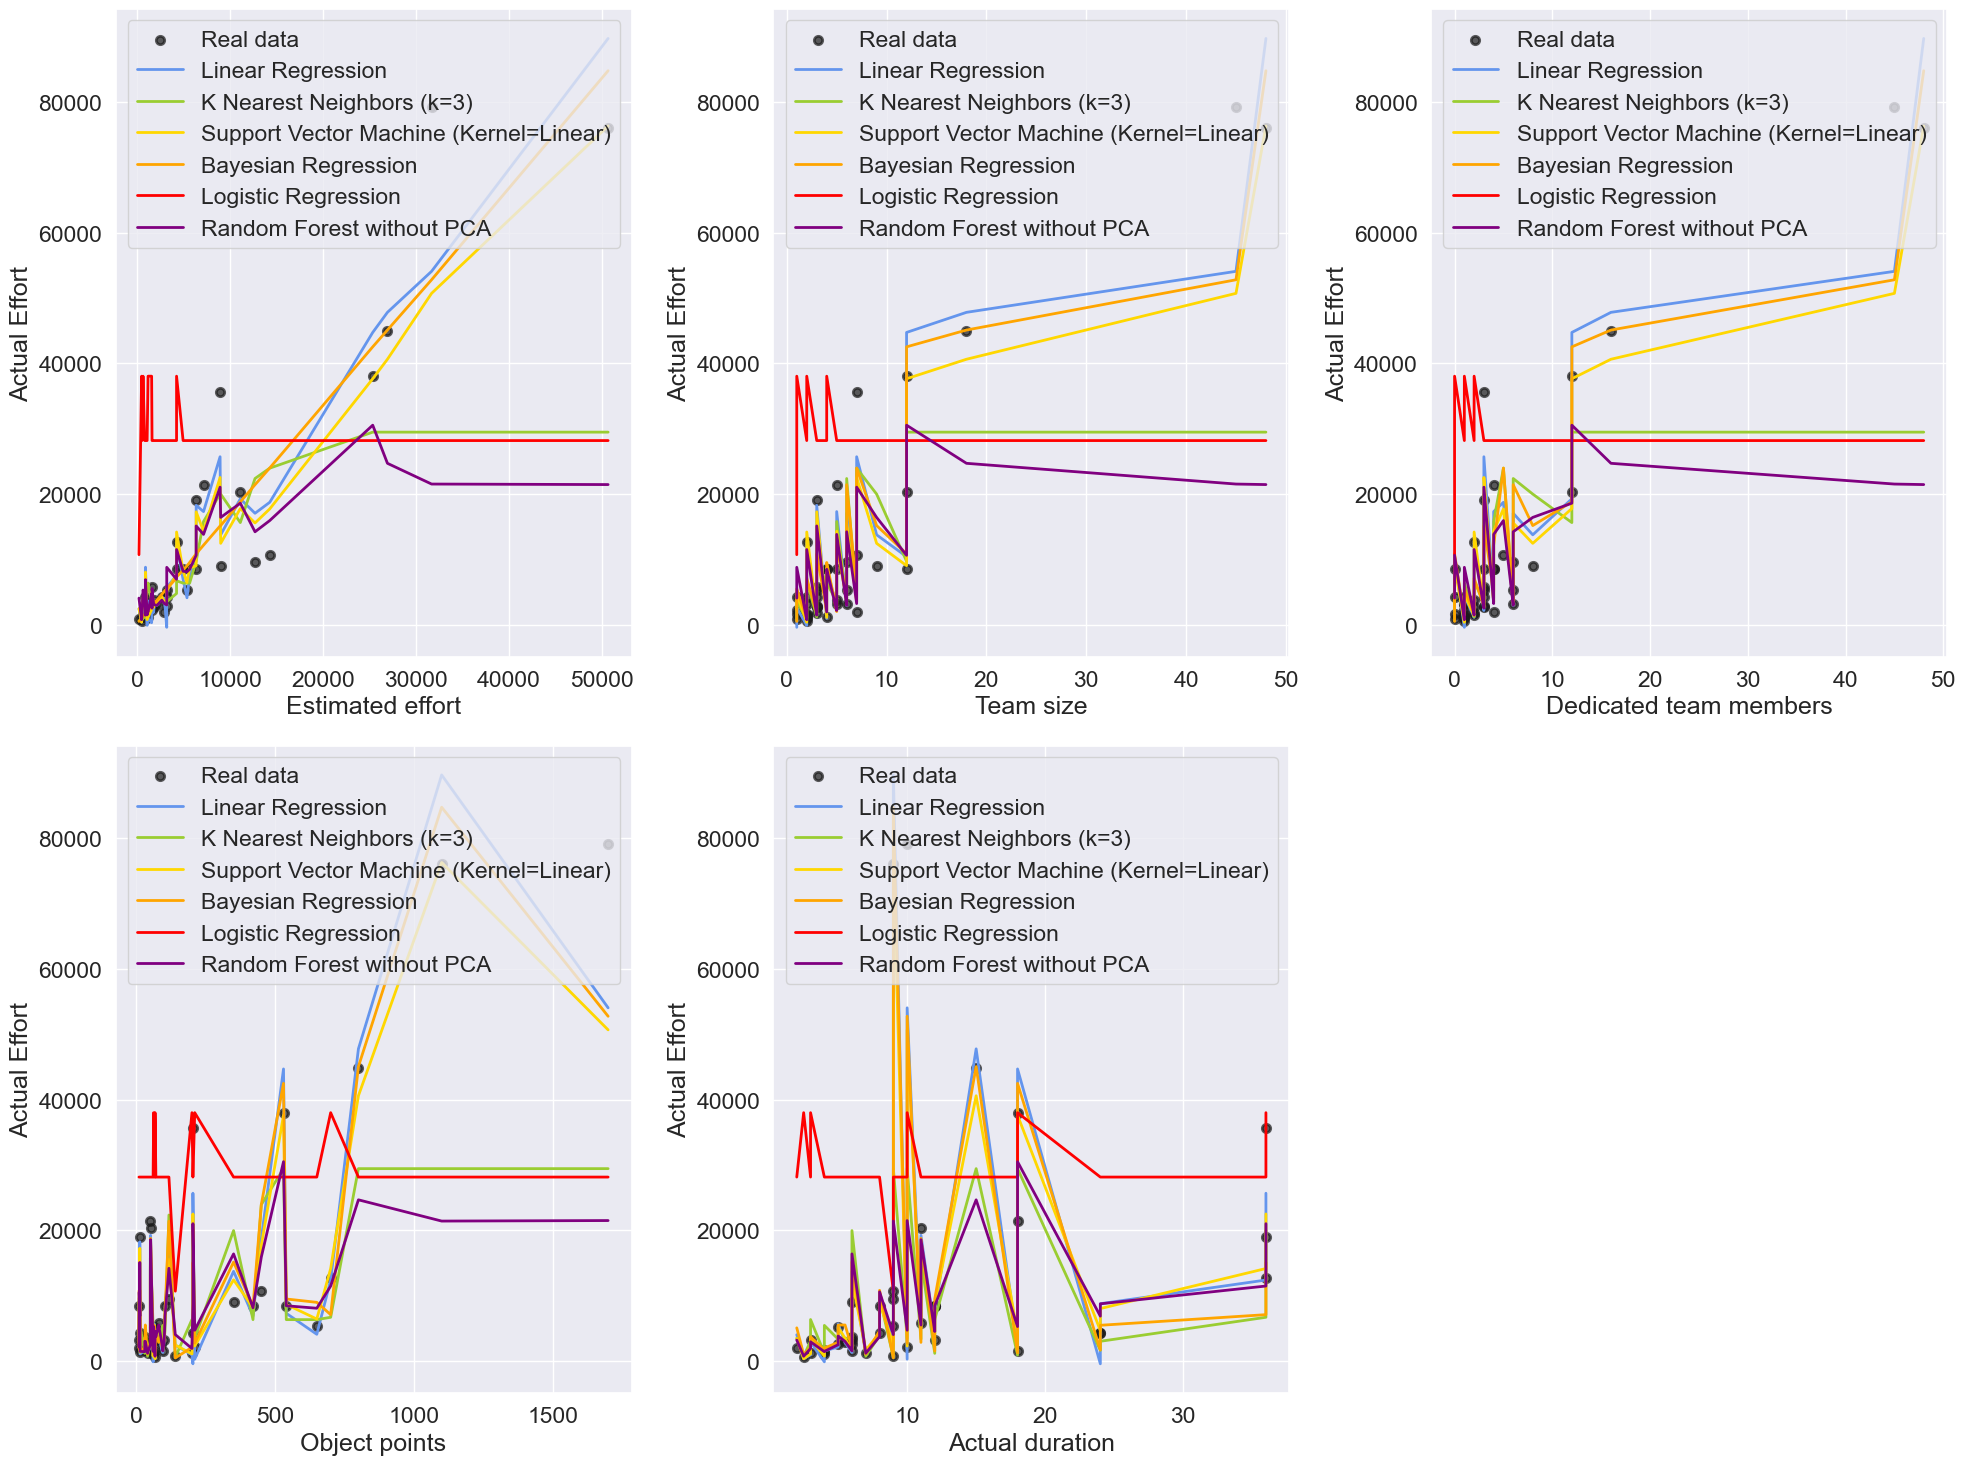

In [ ]:
import matplotlib.pyplot as plt

# Define the features you want to visualize
features_to_visualize = max_corr_features[:5]  # Assuming you want to visualize the top 5 features

plt.figure(figsize=(20, 15))  # Mengatur ukuran gambar lebih besar

for i, feature in enumerate(features_to_visualize):
    plt.subplot(2, 3, i + 1)

    # Real data
    plt.scatter(X_test[feature], y_test, label='Real data', lw=2, alpha=0.7, c='k')

    # Linear Regression Model
    model_xs, model_ys = zip(*sorted(zip(X_test[feature], model.fit(X_train, y_train).predict(X_test))))
    plt.plot(model_xs, model_ys, lw=2, label='Linear Regression', c='cornflowerblue')

    # K-nearest Neighbors
    xs, ys = zip(*sorted(zip(X_test[feature], neigh.fit(X_train, y_train).predict(X_test))))
    plt.plot(xs, ys, lw=2, label='K Nearest Neighbors (k=3)', c='yellowgreen')

    # Support Vector Machine
    svc_model_xs, svc_model_ys = zip(*sorted(zip(X_test[feature], LinearSVC.fit(X_train, y_train).predict(X_test))))
    plt.plot(svc_model_xs, svc_model_ys, lw=2, label='Support Vector Machine (Kernel=Linear)', c='gold')

    # Bayesian Regression
    bayesian_xs, bayesian_ys = zip(*sorted(zip(X_test[feature], bayesian_model.predict(X_test))))
    plt.plot(bayesian_xs, bayesian_ys, lw=2, label='Bayesian Regression', c='orange')

    # Logistic Regression
    logistic_xs, logistic_ys = zip(*sorted(zip(X_test[feature], logistic_model.predict(X_test))))
    plt.plot(logistic_xs, logistic_ys, lw=2, label='Logistic Regression', c='red')

    # Random Forest Regression without PCA
    rf_xs_no_pca, rf_ys_no_pca = zip(*sorted(zip(X_test[feature], regressor.predict(X_test))))
    plt.plot(rf_xs_no_pca, rf_ys_no_pca, lw=2, label='Random Forest without PCA', c='purple')

    plt.xlabel(feature)
    plt.ylabel('Actual Effort')
    plt.legend()

plt.tight_layout()
plt.show()

Tampilkan hasil perbandingan dalam bentuk tabel

In [ ]:
predictions = {
    'Linear Regression': model.fit(X_train, y_train).predict(X_test),
    'K Nearest Neighbors (k=3)': neigh.fit(X_train, y_train).predict(X_test),
    'Support Vector Machine (Kernel=Linear)': LinearSVC.fit(X_train, y_train).predict(X_test),
    'Bayesian Regression': bayesian_model.predict(X_test),
    'Logistic Regression': logistic_model.predict(X_test),
    'Random Forest without PCA': regressor.predict(X_test)
}

# Membuat dataframe dari hasil prediksi
df = pd.DataFrame(predictions)

# Menambahkan kolom Actual Effort
df['Actual Effort'] = y_test.values

# Menampilkan dataframe
print(df)


    Linear Regression  K Nearest Neighbors (k=3)  \
0          941.366805                6350.666667   
1         4026.422431                3487.000000   
2         7506.679731                4752.000000   
3         1860.746719                3505.333333   
4        47788.259218               29450.666667   
5         1192.149605                 733.333333   
6         5702.996807                3490.666667   
7        17288.060953               15770.333333   
8        13732.084255               19968.666667   
9         3757.664640                5456.000000   
10        4091.809220                6336.000000   
11        6911.096306                6336.000000   
12       18710.543232               23936.000000   
13       25683.580966               19968.666667   
14        2571.219383                 909.333333   
15         277.046083                3509.000000   
16        4052.801222                3927.000000   
17        1094.728024                5456.000000   
18        44

c:\Users\Muhammad Andy\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [ ]:
df.to_csv('hasil_perbandingan.xlsx', index=False)


Perbandingan Prediksi Akurasi 25%

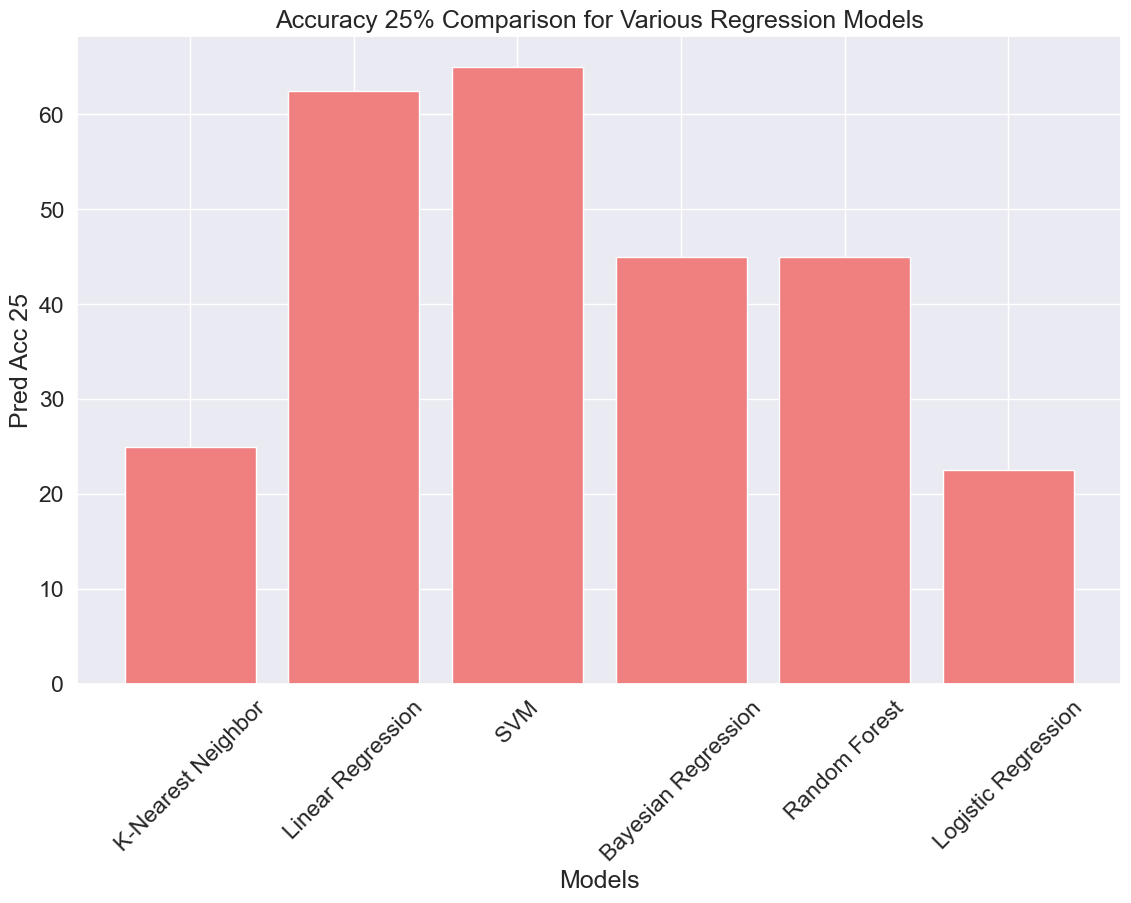

In [ ]:
import matplotlib.pyplot as plt

# Hitung ACC 25 untuk berbagai model
acc_25_values= []


acc_25_values.append(acc_25_knn)
acc_25_values.append(acc_25_linear)
acc_25_values.append(acc_25_svm)
acc_25_values.append(acc_25_bayesian)
acc_25_values.append(acc_25_rf)
acc_25_values.append(acc_25_logistic)

# Daftar model
models = ['K-Nearest Neighbor', 'Linear Regression', 'SVM', 'Bayesian Regression', 'Random Forest', 'Logistic Regression']

# Buat grafik perbandingan RMSE
plt.figure(figsize=(12, 8))
plt.bar(models, acc_25_values, color='lightcoral')
plt.title('Accuracy 25% Comparison for Various Regression Models')
plt.xlabel('Models')
plt.ylabel('Pred Acc 25')
plt.xticks(rotation=45)
plt.show()


Perbandingan Prediksi Akurasi 50%

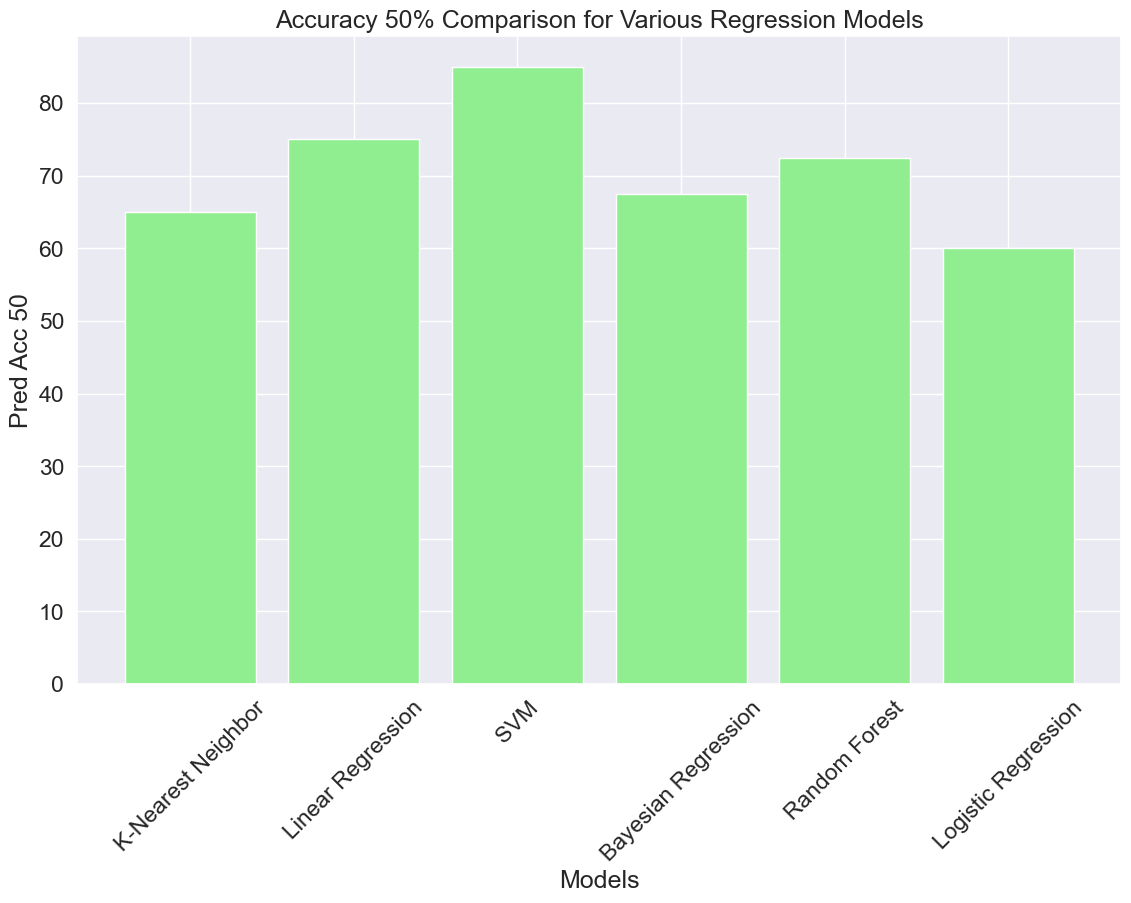

In [ ]:
import matplotlib.pyplot as plt

# Hitung ACC 50 untuk berbagai model
acc_50_values= []
acc_50_values.append(acc_50_knn)
acc_50_values.append(acc_50_linear)
acc_50_values.append(acc_50_svm)
acc_50_values.append(acc_50_bayesian)
acc_50_values.append(acc_50_rf)
acc_50_values.append(acc_50_logistic)
# Daftar model
models = ['K-Nearest Neighbor', 'Linear Regression', 'SVM', 'Bayesian Regression', 'Random Forest', 'Logistic Regression']
# Buat grafik perbandingan RMSE
plt.figure(figsize=(12, 8))
plt.bar(models, acc_50_values, color='lightgreen')
plt.title('Accuracy 50% Comparison for Various Regression Models')
plt.xlabel('Models')
plt.ylabel('Pred Acc 50')
plt.xticks(rotation=45)
plt.show()

Perbandingan Mean Square Error (MSE)

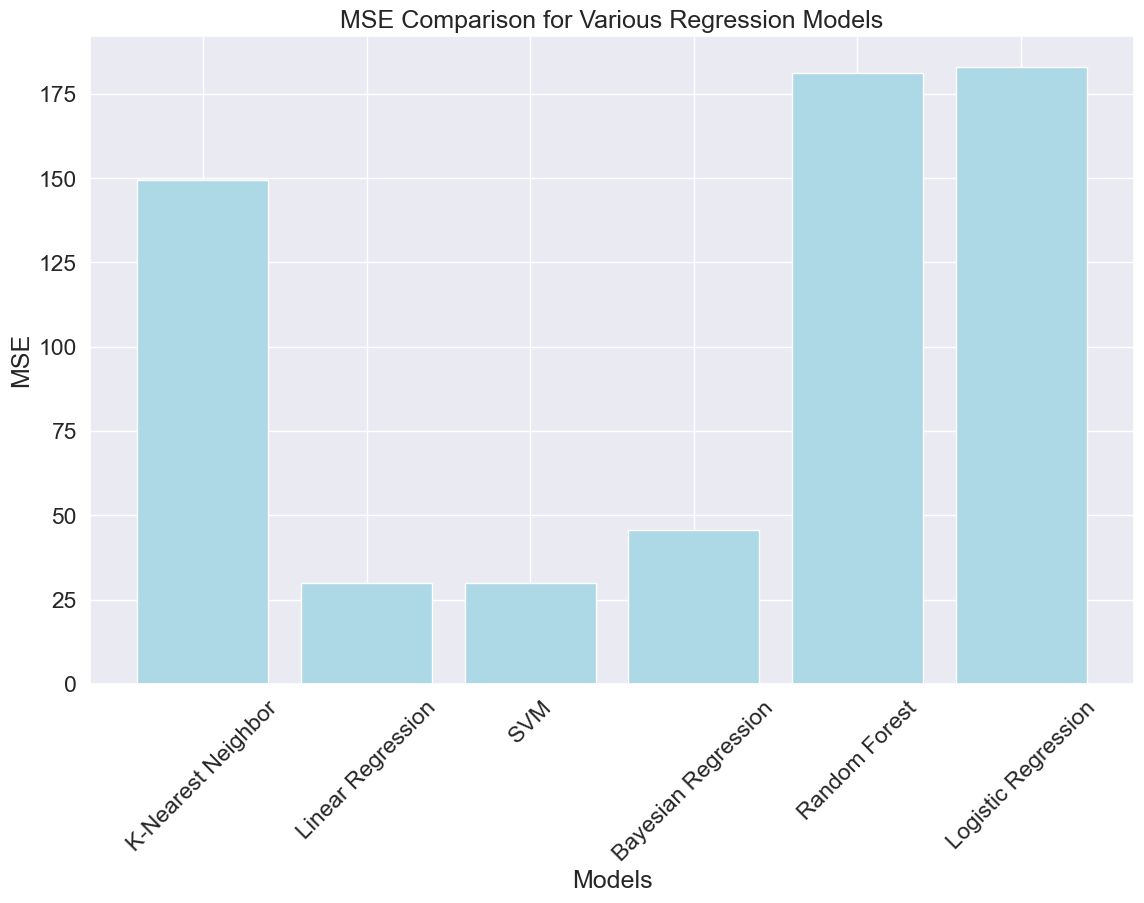

In [ ]:
import matplotlib.pyplot as plt

# Hitung MSE untuk berbagai model
mse_values = []


mse_values.append(mse_knn)
mse_values.append(mse_linear)
mse_values.append(mse_svm)
mse_values.append(mse_bayesian)
mse_values.append(mse_rf)
mse_values.append(mse_logistic)

# Daftar model
models = ['K-Nearest Neighbor', 'Linear Regression', 'SVM', 'Bayesian Regression', 'Random Forest', 'Logistic Regression']

# Buat grafik perbandingan RMSE
plt.figure(figsize=(12, 8))
plt.bar(models, mse_values, color='lightblue')
plt.title('MSE Comparison for Various Regression Models')
plt.xlabel('Models')
plt.ylabel('MSE')
plt.xticks(rotation=45)
plt.show()


Perbandingan Root Mean Square Error (RMSE)

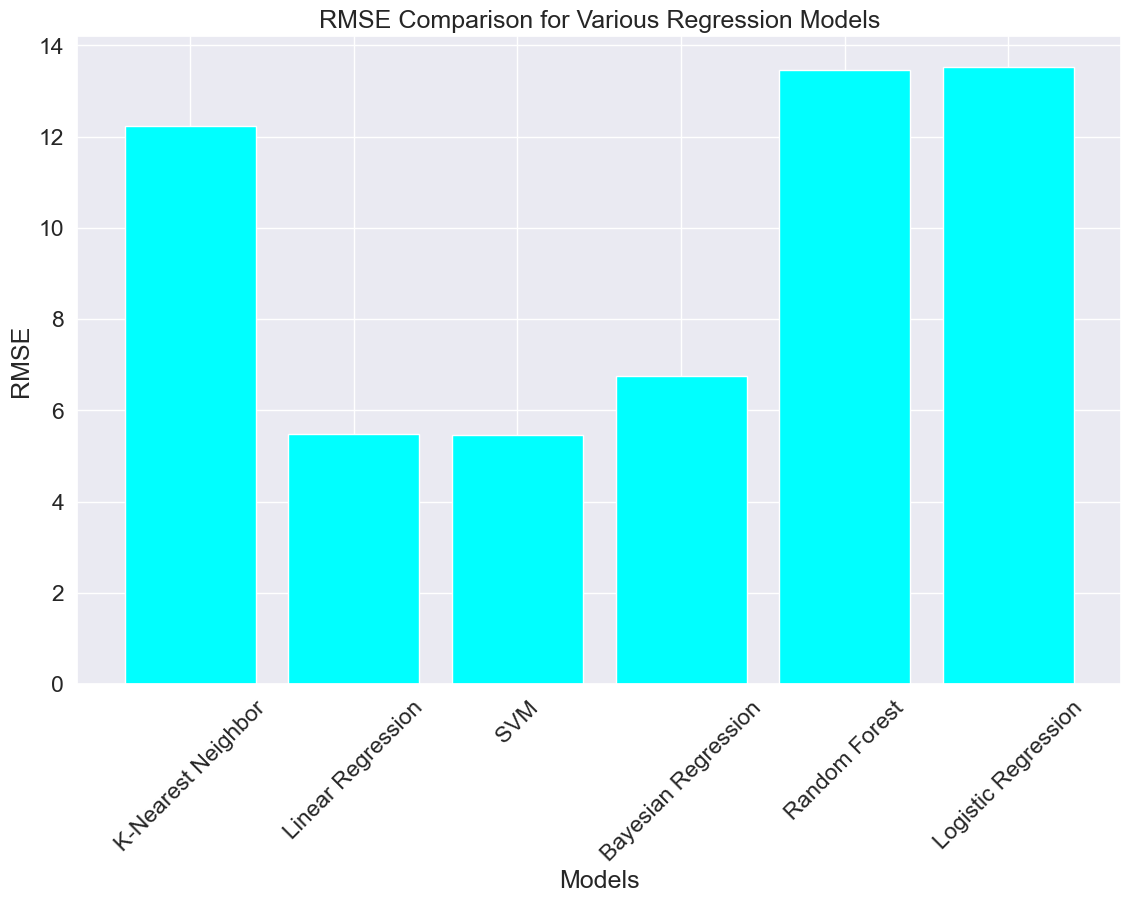

In [ ]:
import matplotlib.pyplot as plt

# Hitung RMSE untuk berbagai model
rmse_values = []


rmse_values.append(rmse_knn)
rmse_values.append(rmse_linear)
rmse_values.append(rmse_svm)
rmse_values.append(rmse_bayesian)
rmse_values.append(rmse_rf)
rmse_values.append(rmse_logistic)

# Daftar model
models = ['K-Nearest Neighbor', 'Linear Regression', 'SVM', 'Bayesian Regression', 'Random Forest', 'Logistic Regression']

# Buat grafik perbandingan RMSE
plt.figure(figsize=(12, 8))
plt.bar(models, rmse_values, color='cyan')
plt.title('RMSE Comparison for Various Regression Models')
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.xticks(rotation=45)
plt.show()


Perhitungan Mean Absolute Error (MAE)

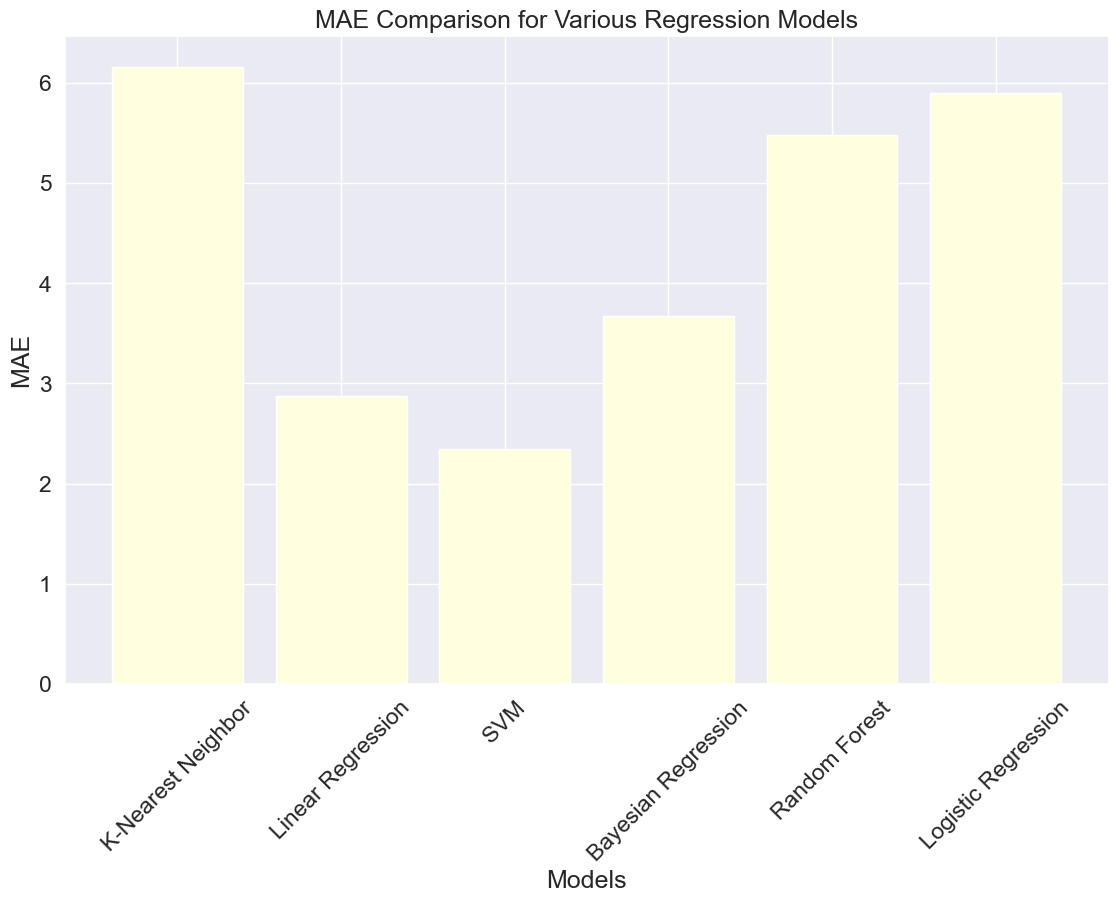

In [ ]:
import matplotlib.pyplot as plt

# Hitung MAE untuk berbagai model
mae_values = []

mae_values.append(mae_knn)
mae_values.append(mae_linear)
mae_values.append(mae_svm)
mae_values.append(mae_bayesian)
mae_values.append(mae_rf)
mae_values.append(mae_logistic)

# Daftar model
models = ['K-Nearest Neighbor', 'Linear Regression', 'SVM', 'Bayesian Regression', 'Random Forest', 'Logistic Regression']

# Buat grafik perbandingan RMSE
plt.figure(figsize=(12, 8))
plt.bar(models, mae_values, color='lightyellow')
plt.title('MAE Comparison for Various Regression Models')
plt.xlabel('Models')
plt.ylabel('MAE')
plt.xticks(rotation=45)
plt.show()


Perbandingan R Square

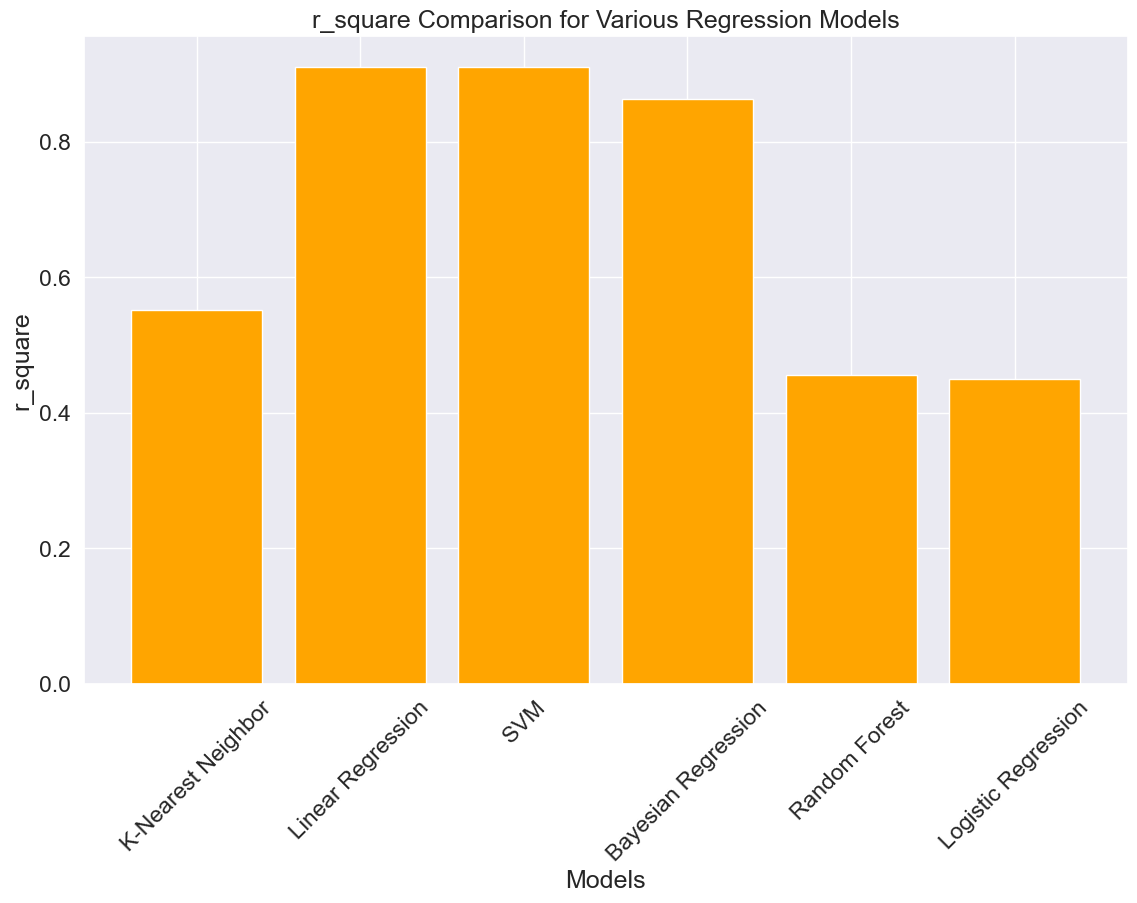

In [ ]:
import matplotlib.pyplot as plt

# Hitung r square untuk berbagai model
r_square_values = []


r_square_values.append(r_square_knn)
r_square_values.append(r_square_linear)
r_square_values.append(r_square_svm)
r_square_values.append(r_square_bayesian)
r_square_values.append(r_square_rf)
r_square_values.append(r_square_logistic)

# Daftar model
models = ['K-Nearest Neighbor', 'Linear Regression', 'SVM', 'Bayesian Regression', 'Random Forest', 'Logistic Regression']

# Buat grafik perbandingan RMSE
plt.figure(figsize=(12, 8))
plt.bar(models, r_square_values, color='orange')
plt.title('r_square Comparison for Various Regression Models')
plt.xlabel('Models')
plt.ylabel('r_square')
plt.xticks(rotation=45)
plt.show()


Perbandingan Mean Magnitude of Relative Error (MMRE)

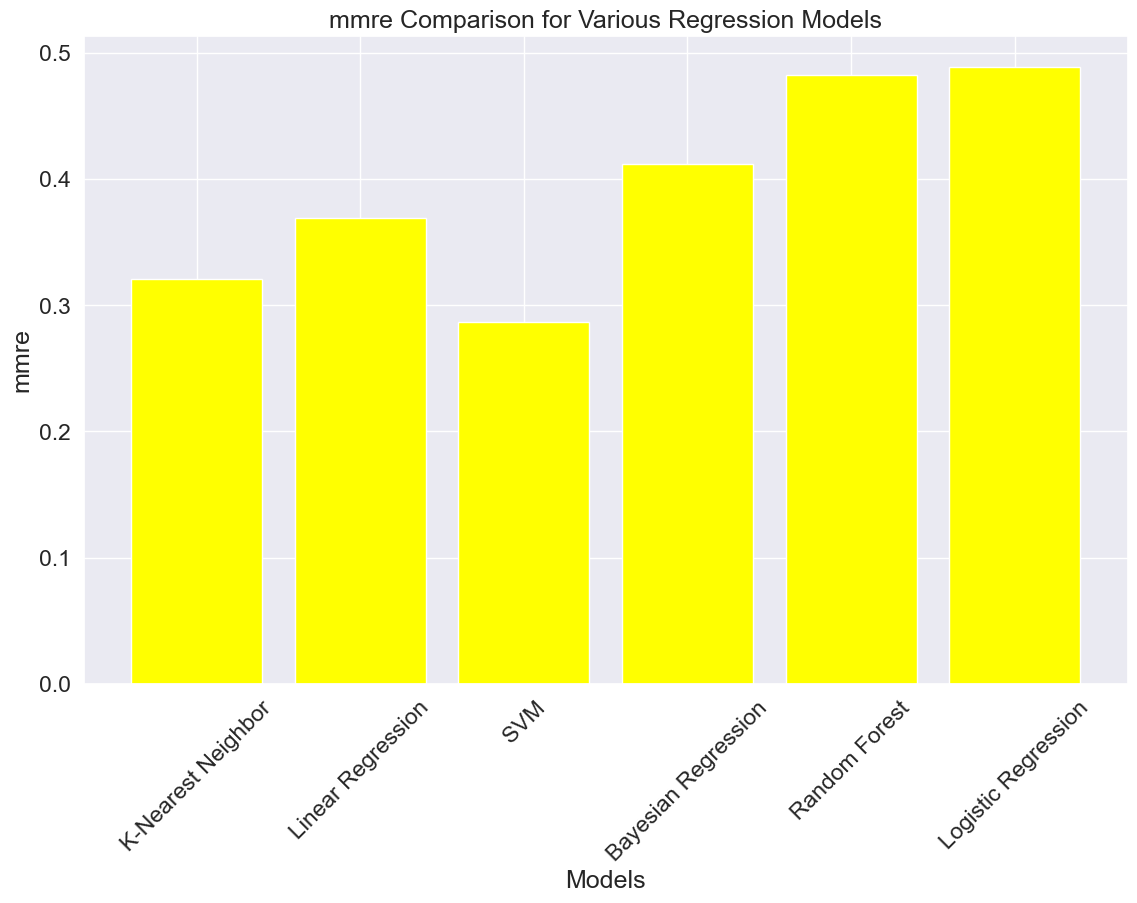

In [ ]:
import matplotlib.pyplot as plt

# Hitung mmre untuk berbagai model
mmre_values = []


mmre_values.append(mmre_knn)
mmre_values.append(mmre_linear)
mmre_values.append(mmre_svm)
mmre_values.append(mmre_bayesian)
mmre_values.append(mmre_rf)
mmre_values.append(mmre_logistic)

# Daftar model
models = ['K-Nearest Neighbor', 'Linear Regression', 'SVM', 'Bayesian Regression', 'Random Forest', 'Logistic Regression']

# Buat grafik perbandingan RMSE
plt.figure(figsize=(12, 8))
plt.bar(models,mmre_values, color='yellow')
plt.title('mmre Comparison for Various Regression Models')
plt.xlabel('Models')
plt.ylabel('mmre')
plt.xticks(rotation=45)
plt.show()


Perbandingan Median Magnitude of Relative Error (mdmre)

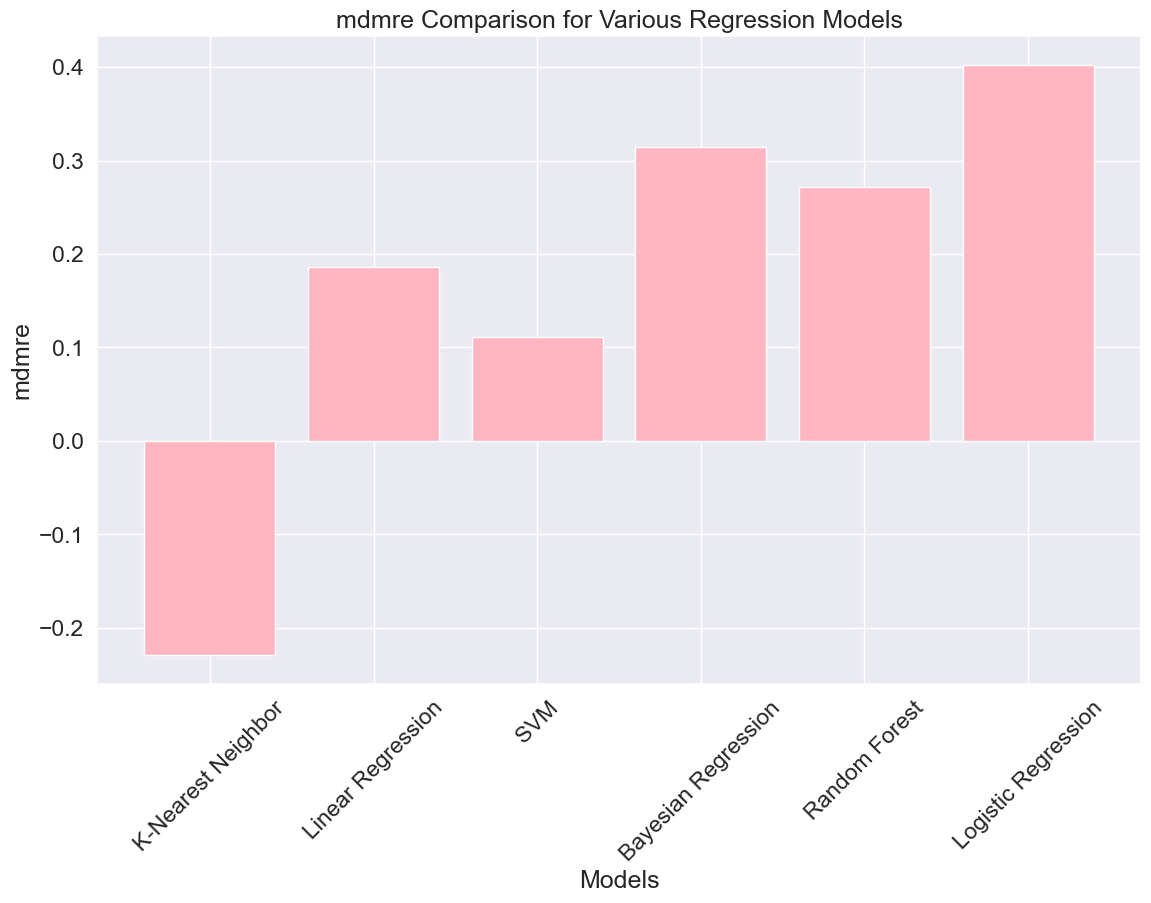

In [ ]:
import matplotlib.pyplot as plt

# Hitung mdmre untuk berbagai model
mdmre_values = []


mdmre_values.append(mdmre_knn)
mdmre_values.append(mdmre_linear)
mdmre_values.append(mdmre_svm)
mdmre_values.append(mdmre_bayesian)
mdmre_values.append(mdmre_rf)
mdmre_values.append(mdmre_logistic)

# Daftar model
models = ['K-Nearest Neighbor', 'Linear Regression', 'SVM', 'Bayesian Regression', 'Random Forest', 'Logistic Regression']

# Buat grafik perbandingan RMSE
plt.figure(figsize=(12, 8))
plt.bar(models,mdmre_values, color='lightpink')
plt.title('mdmre Comparison for Various Regression Models')
plt.xlabel('Models')
plt.ylabel('mdmre')
plt.xticks(rotation=45)
plt.show()


Perbandingan Median Magnitude of Error Relative (MMER)

6.159495833333333


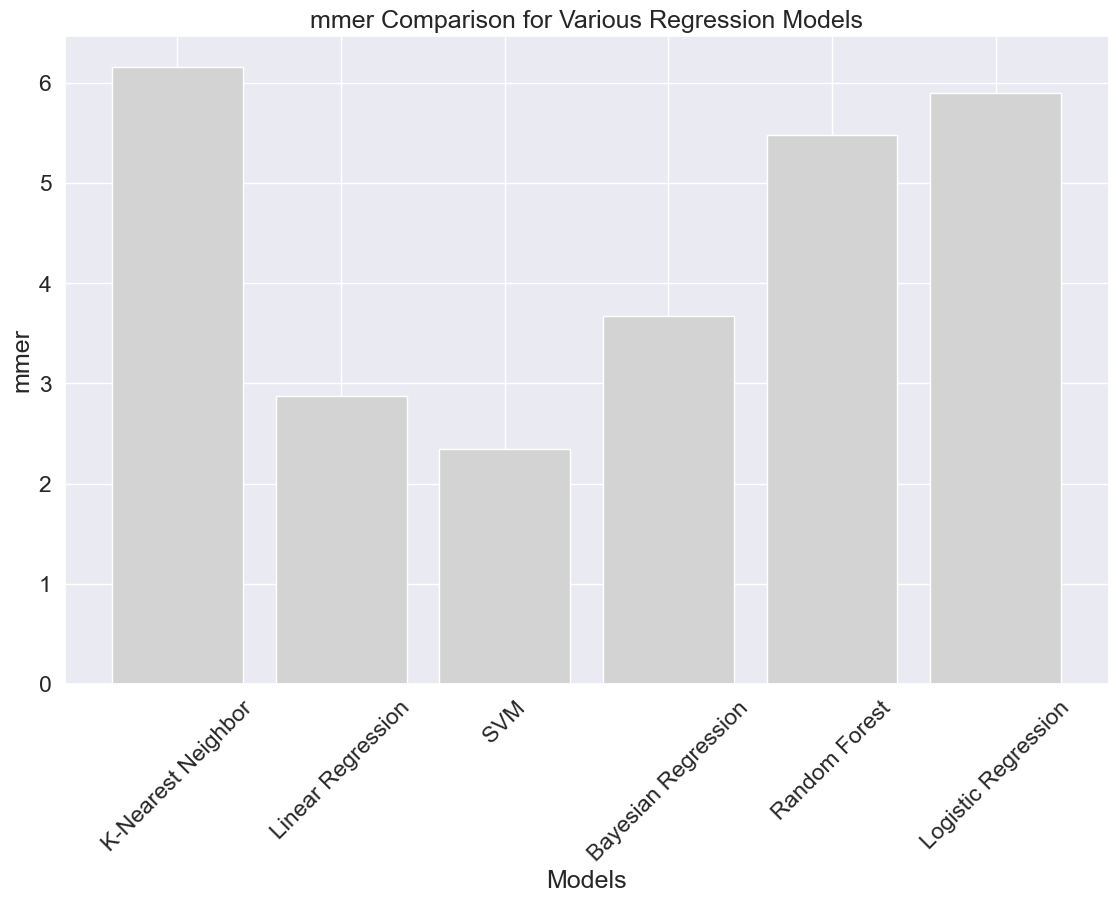

In [ ]:
import matplotlib.pyplot as plt
# Hitung mdmre untuk berbagai model
mmer_values = []
mmer_values.append(mmer_knn)
mmer_values.append(mmer_linear)
mmer_values.append(mmer_svm)
mmer_values.append(mmer_bayesian)
mmer_values.append(mmer_rf)
mmer_values.append(mmer_logistic)
print(mmer_knn)
# Daftar model
models = ['K-Nearest Neighbor', 'Linear Regression', 'SVM', 'Bayesian Regression', 'Random Forest', 'Logistic Regression']
# Buat grafik perbandingan RMSE
plt.figure(figsize=(12, 8))
plt.bar(models,mmer_values, color='lightgrey')
plt.title('mmer Comparison for Various Regression Models')
plt.xlabel('Models')
plt.ylabel('mmer')
plt.xticks(rotation=45)
plt.show()

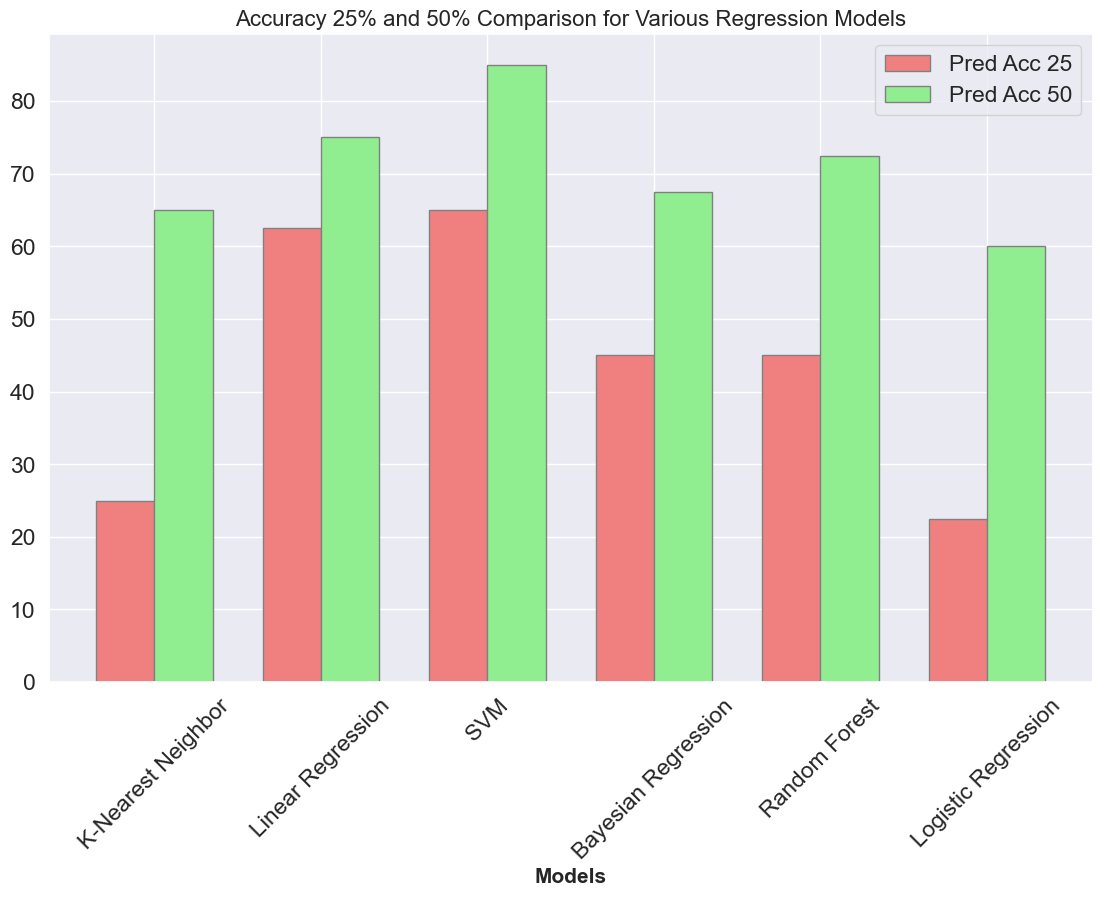

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data untuk prediksi accuracy 25%
acc_25_values = [acc_25_knn, acc_25_linear, acc_25_svm, acc_25_bayesian, acc_25_rf, acc_25_logistic]

# Data untuk prediksi accuracy 50%
acc_50_values = [acc_50_knn, acc_50_linear, acc_50_svm, acc_50_bayesian, acc_50_rf, acc_50_logistic]

# Daftar model
models = ['K-Nearest Neighbor', 'Linear Regression', 'SVM', 'Bayesian Regression', 'Random Forest', 'Logistic Regression']

# Buat posisi untuk grup bar
bar_width = 0.35
r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]

# Buat grafik perbandingan RMSE
plt.figure(figsize=(12, 8))

# Plot untuk accuracy 25%
plt.bar(r1, acc_25_values, color='lightcoral', width=bar_width, edgecolor='grey', label='Pred Acc 25')

# Plot untuk accuracy 50%
plt.bar(r2, acc_50_values, color='lightgreen', width=bar_width, edgecolor='grey', label='Pred Acc 50')

# Atur label dan judul
plt.xlabel('Models', fontweight='bold', fontsize=15)
plt.xticks([r + bar_width/2 for r in range(len(models))], models, rotation=45)
plt.title('Accuracy 25% and 50% Comparison for Various Regression Models', fontsize=16)
plt.legend()

# Tampilkan grafik
plt.show()